# **Business Understanding**  

## **Latar Belakang**  
Sebagai salah satu kota metropolitan terbesar dunia, New York City memiliki sistem transportasi yang sangat sibuk dan kompleks.  Di tengah kesibukannya, taksi berperan vital dalam menyediakan layanan transportasi cepat dan fleksibel, menjangkau area yang mungkin sulit diakses oleh kereta bawah tanah dan bus.

## **Pernyataan Masalah**  
Dalam industri taksi, memahami perilaku dan kebutuhan pelanggan menjadi elemen krusial untuk mengoptimalkan kinerja operasional dan meningkatkan profitabilitas. Analisis mendalam terhadap pola permintaan, preferensi wilayah, serta faktor-faktor yang memengaruhi kepuasan pelanggan, seperti mengetahui faktor-faktor yang mempengaruhi pemberian tip, dapat memberikan wawasan strategis. Hal ini memungkinkan perusahaan untuk menentukan kapan dan di mana layanan paling dibutuhkan serta mengidentifikasi cara terbaik untuk memberikan pengalaman pelanggan yang lebih memuaskan.  

Analisis lebih lanjut terhadap beberapa aspek operasional taksi akan menghasilkan solusi yang lebih spesifik dan tepat guna.  Aspek-aspek tersebut meliputi:  
- Variasi pola permintaan berdasarkan waktu dan lokasi.
- Memahami preferensi pelanggan berdasarkan kode rate, tipe pembayaran dan tipe perjalanan.
- Identifikasi karakteristik perjalanan berdasarkan jarak, durasi dan kecepatan mengemudi.
- Identifikasi distribusi pendapatan dari tipe perjalanan yang berbeda untuk penyesuaian tarif.
- Faktor-faktor yang memengaruhi jumlah tip yang diberikan oleh pelanggan.  

## **Tujuan**  
Proyek ini bertujuan untuk menghasilkan wawasan berbasis data yang dapat digunakan oleh pemangku kepentingan untuk mendukung pengambilan keputusan strategis. Fokus utama analisis meliputi:  

1. **Mengoptimalkan Distribusi Armada Taksi**  
   - Menganalisis pola permintaan untuk meningkatkan efisiensi alokasi armada berdasarkan karakteristik waktu dan lokasi dengan tujuan untuk meningkatkan efisiensi operasional.

2. **Meningkatkan Kepuasan dan Loyalitas Pelanggan**  
   - Mengidentifikasi preferensi pelanggan agar layanan dapat disesuaikan untuk memberikan pengalaman yang lebih baik dan mendorong loyalitas.

3. **Memaksimalkan Pendapatan**  
   - Mengeksplorasi strategi penetapan harga, promosi, serta potensi layanan tambahan berdasarkan analisis wilayah dan rute perjalanan.  

4. **Memahami Faktor yang Mendorong Tip**  
   - Menggali faktor-faktor utama yang memengaruhi keputusan pelanggan untuk memberikan tip, sehingga memungkinkan perusahaan meningkatkan layanan secara strategis.  

Dengan pendekatan ini, analisis yang dilakukan diharapkan dapat membantu perusahaan taksi meningkatkan profitabilitas dan efisiensi operasional, sekaligus memenuhi kebutuhan dan preferensi pelanggan untuk mencapai kepuasan dan loyalitas yang lebih tinggi.

# Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Load Dataset

In [7]:
from google.colab import files
uploaded = files.upload()

Saving NYC TLC Trip Record Cleaned.csv to NYC TLC Trip Record Cleaned.csv


In [9]:
df = pd.read_csv('NYC TLC Trip Record Cleaned.csv')
df.head()

,Unnamed: 0,lpep_pickup_datetime,lpep_dropoff_datetime,day_category,pickup_time,RatecodeID,PULocationID,PUBorough,PUZone,DOLocationID,DOBorough,DOZone,passenger_count,trip_distance,distance_bins,fare_amount,fare_amount_bins,tip_amount,tip_amount_bins,payment_type,trip_type,trip_duration,duration_bins,speed,speed_bins
0,0,2023-01-01 00:26:10,2023-01-01 00:37:11,Weekend,Midnight,Standard rate,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1.0,2.58,3-5 miles,52.17,41-60$,4.03,1-5$,Credit card,Street-hail,11.016667,11-20 minutes,14.05,11-20 mph
1,1,2023-01-01 00:51:03,2023-01-01 00:57:49,Weekend,Midnight,Standard rate,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1.0,1.81,<2 miles,17.70,<20$,2.64,1-5$,Credit card,Street-hail,6.766667,<10 minutes,16.05,11-20 mph
2,3,2023-01-01 00:13:14,2023-01-01 00:19:03,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North,1.0,1.30,<2 miles,52.17,41-60$,1.70,1-5$,Credit card,Street-hail,5.816667,<10 minutes,13.41,11-20 mph
3,4,2023-01-01 00:33:04,2023-01-01 00:39:02,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North,1.0,1.10,<2 miles,52.17,41-60$,0.00,0$,Credit card,Street-hail,5.966667,<10 minutes,11.06,11-20 mph
4,5,2023-01-01 00:53:31,2023-01-01 01:11:04,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,262,Manhattan,Yorkville East,1.0,2.78,3-5 miles,52.17,41-60$,0.00,0$,Cash,Street-hail,17.550000,11-20 minutes,9.50,<10 mph


In [10]:
df = df.drop('Unnamed: 0', axis=1)

# **Skimming Data**

In [11]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(2)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,lpep_pickup_datetime,object,0.0,0.0,0.00,0,59508,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
1,lpep_dropoff_datetime,object,0.0,0.0,0.00,0,59493,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
2,day_category,object,0.0,0.0,0.00,0,2,"[Weekend, Weekdays]"
3,pickup_time,object,0.0,0.0,0.00,0,5,"[Midnight, Morning, Noon, Evening, Night]"
4,RatecodeID,object,0.0,0.0,0.00,0,4,"[Standard rate, Negotiated fare, JFK Airport, ..."
5,PULocationID,int64,0.0,0.0,0.00,0,192,"[166, 24, 41, 181, 255, 75, 66, 195, 83, 97, 7..."
6,PUBorough,object,0.0,0.0,0.00,0,5,"[Manhattan, Brooklyn, Queens, Bronx, Staten Is..."
7,PUZone,object,0.0,0.0,0.00,0,191,"[Morningside Heights, Bloomingdale, Central Ha..."
8,DOLocationID,int64,0.0,0.0,0.00,0,243,"[143, 43, 238, 74, 262, 45, 75, 166, 140, 234,..."
9,DOBorough,object,0.0,0.0,0.00,0,6,"[Manhattan, Brooklyn, Queens, Bronx, EWR, Stat..."


# Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60698 entries, 0 to 60697
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   60698 non-null  object 
 1   lpep_dropoff_datetime  60698 non-null  object 
 2   day_category           60698 non-null  object 
 3   pickup_time            60698 non-null  object 
 4   RatecodeID             60698 non-null  object 
 5   PULocationID           60698 non-null  int64  
 6   PUBorough              60698 non-null  object 
 7   PUZone                 60698 non-null  object 
 8   DOLocationID           60698 non-null  int64  
 9   DOBorough              60698 non-null  object 
 10  DOZone                 60698 non-null  object 
 11  passenger_count        60698 non-null  object 
 12  trip_distance          60698 non-null  float64
 13  distance_bins          60698 non-null  object 
 14  fare_amount            60698 non-null  float64
 15  fa

## Data Categorical

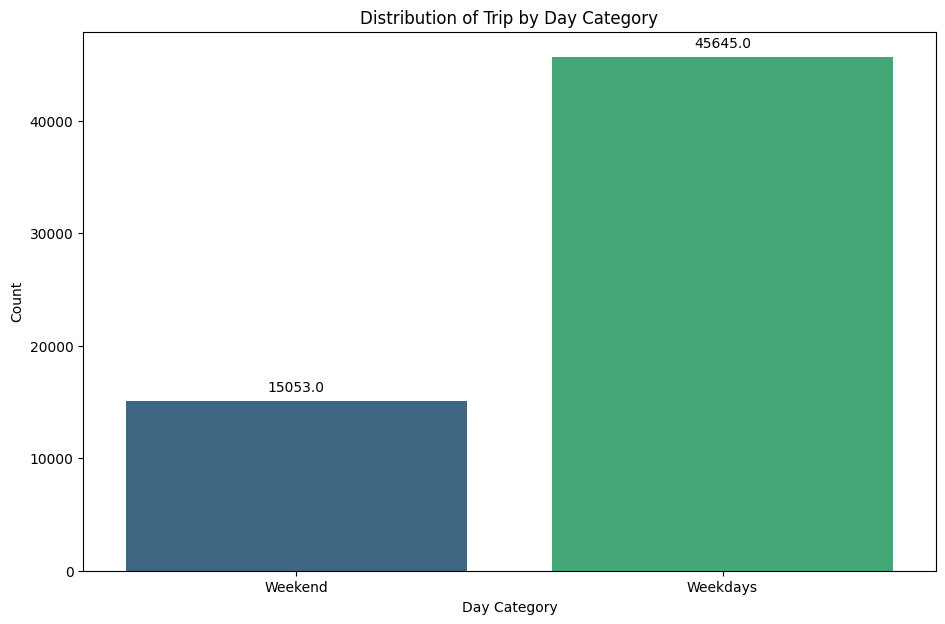

In [13]:
plt.figure(figsize=(11, 7))
sns.countplot(x='day_category', data=df,palette='viridis')
plt.title('Distribution of Trip by Day Category')
plt.xlabel('Day Category')
plt.ylabel('Count')

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

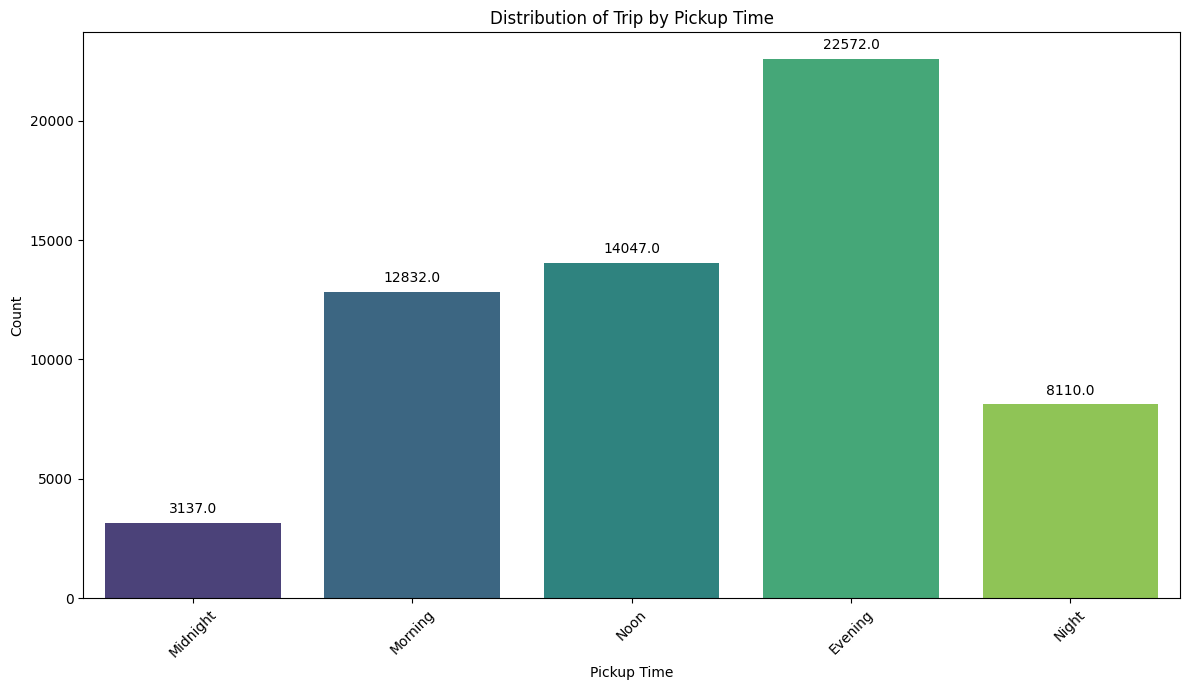

In [14]:
plt.figure(figsize=(12, 7))
sns.countplot(x='pickup_time', data=df, palette='viridis')
plt.title('Distribution of Trip by Pickup Time')
plt.xlabel('Pickup Time')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

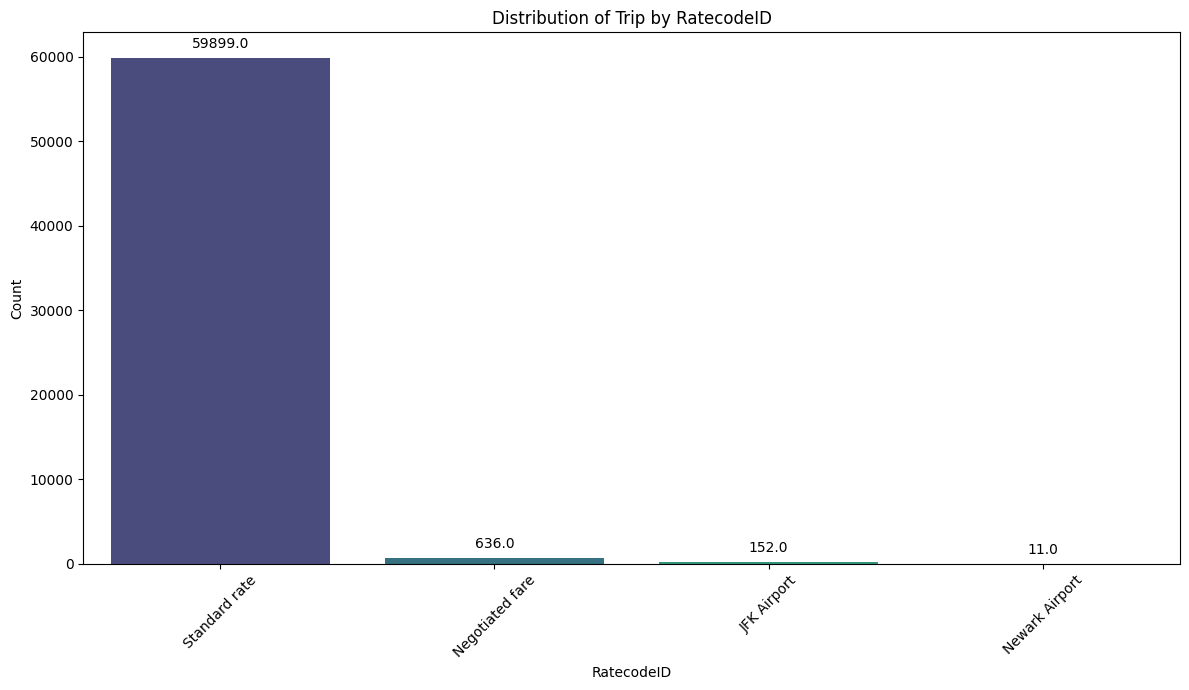

In [15]:
plt.figure(figsize=(12, 7))
sns.countplot(x='RatecodeID', data=df, palette='viridis')
plt.title('Distribution of Trip by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

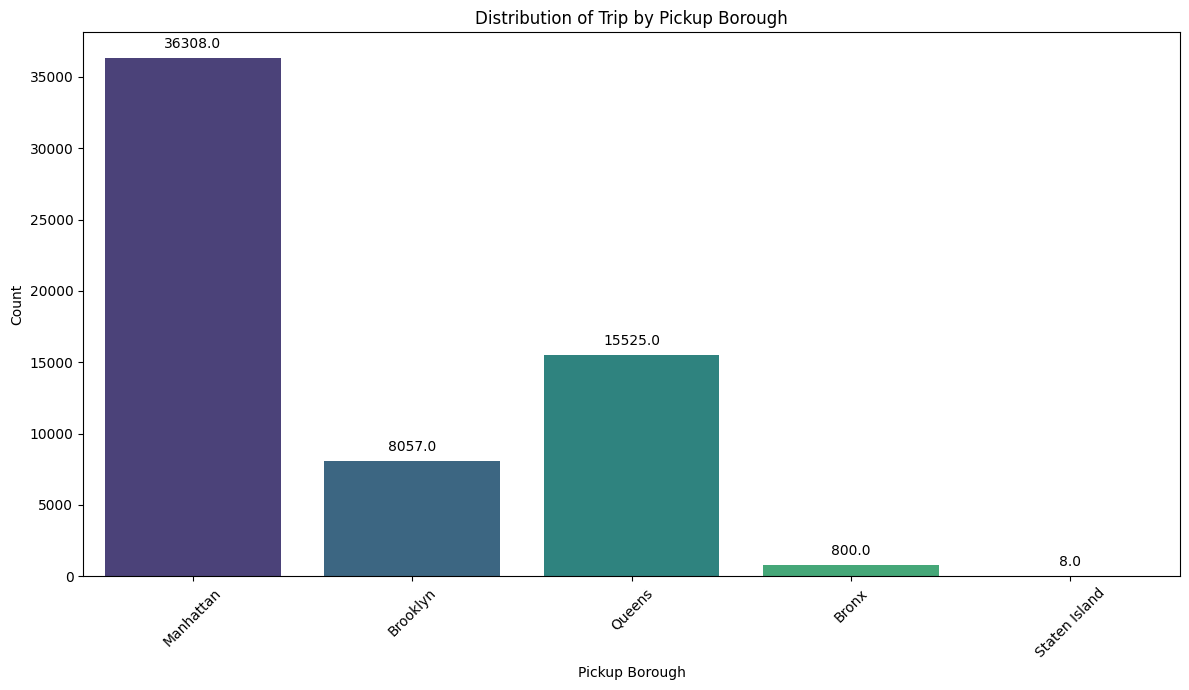

In [16]:
plt.figure(figsize=(12, 7))
sns.countplot(x='PUBorough', data=df, palette='viridis')
plt.title('Distribution of Trip by Pickup Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

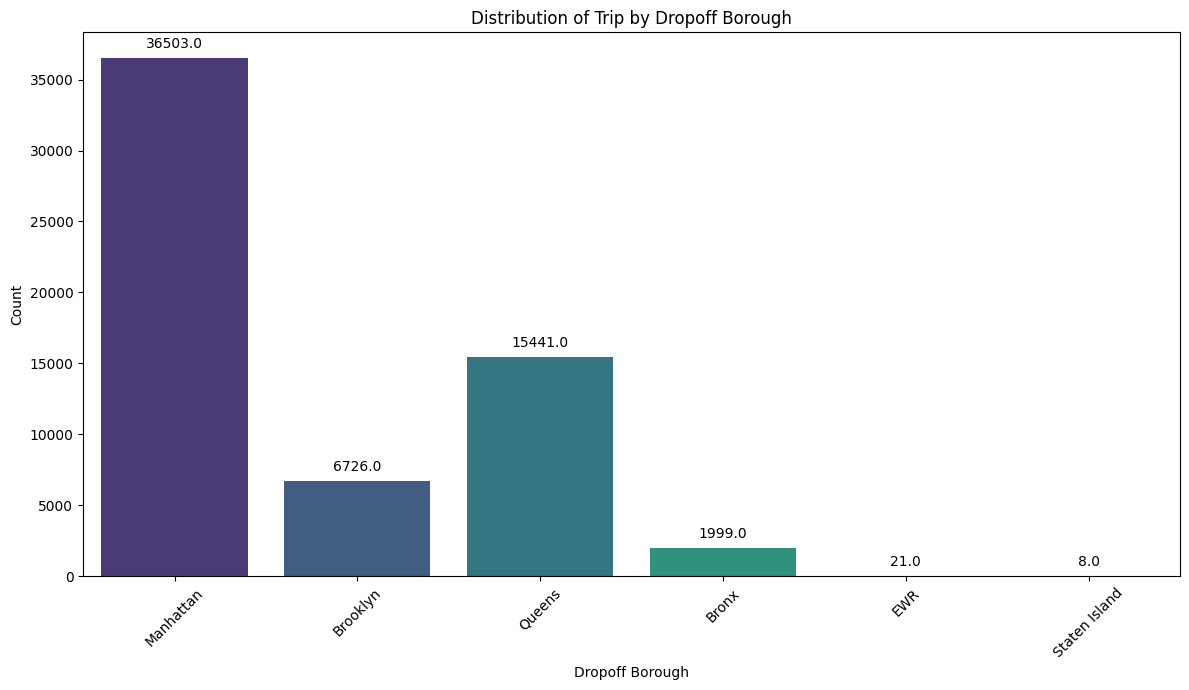

In [17]:
plt.figure(figsize=(12, 7))
sns.countplot(x='DOBorough', data=df, palette='viridis')
plt.title('Distribution of Trip by Dropoff Borough')
plt.xlabel('Dropoff Borough')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

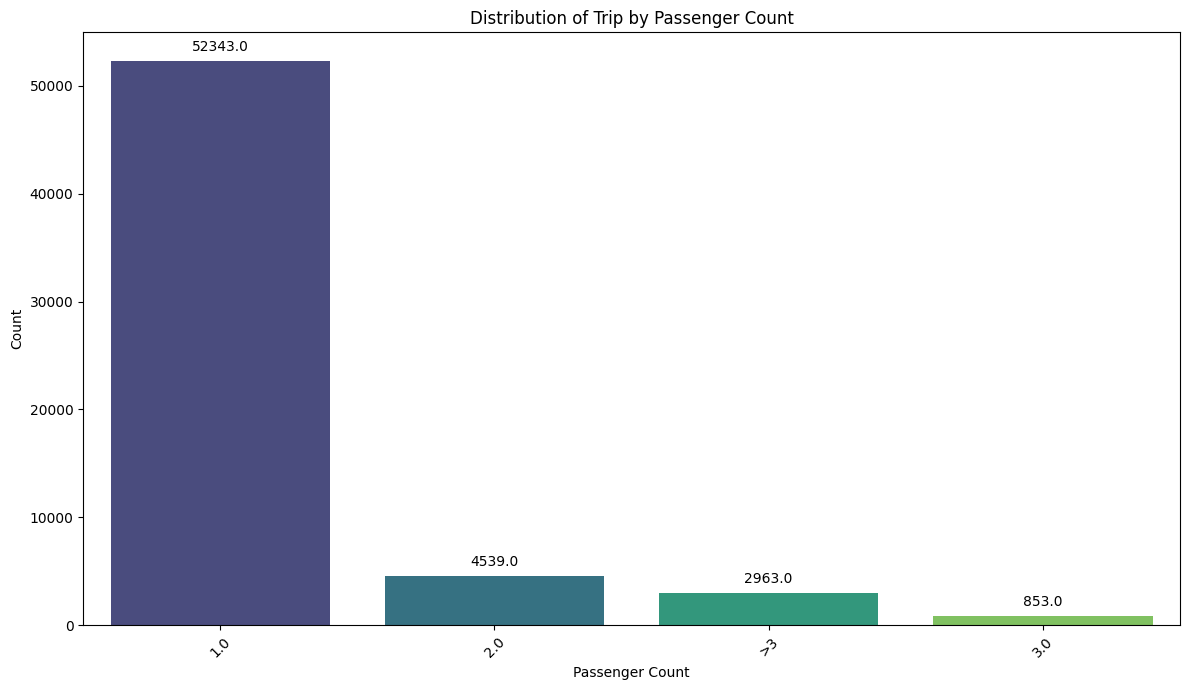

In [18]:
plt.figure(figsize=(12, 7))
sns.countplot(x='passenger_count', data=df, palette='viridis')
plt.title('Distribution of Trip by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

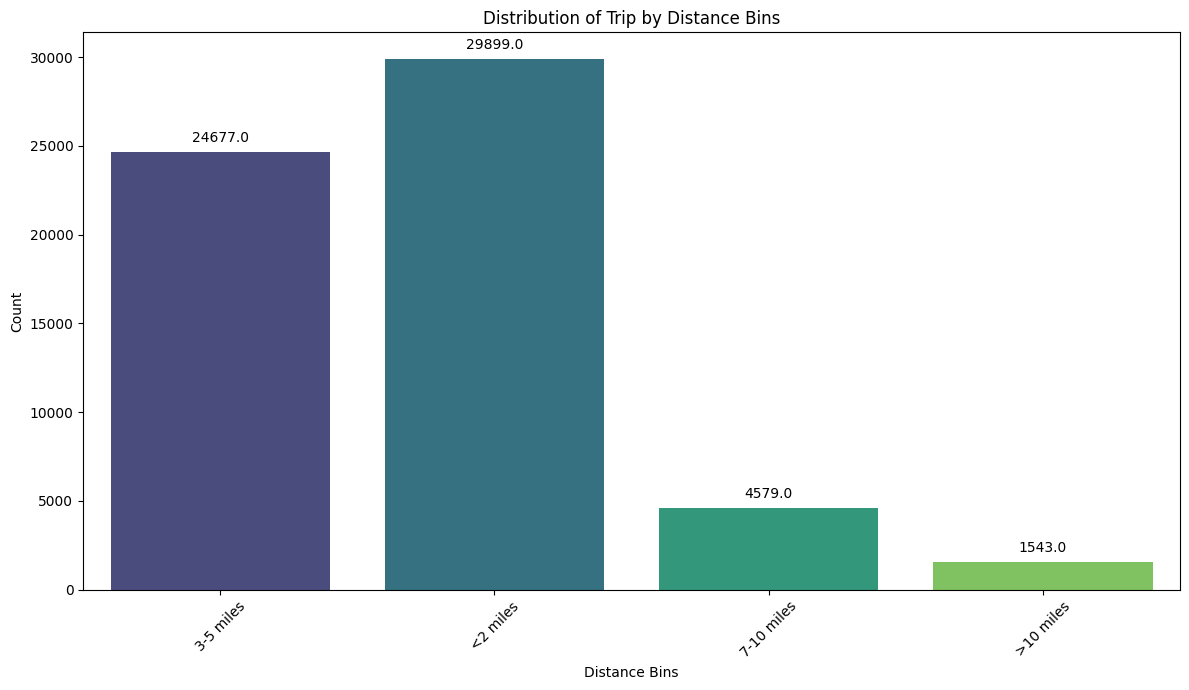

In [19]:
plt.figure(figsize=(12, 7))
sns.countplot(x='distance_bins', data=df, palette='viridis')
plt.title('Distribution of Trip by Distance Bins')
plt.xlabel('Distance Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

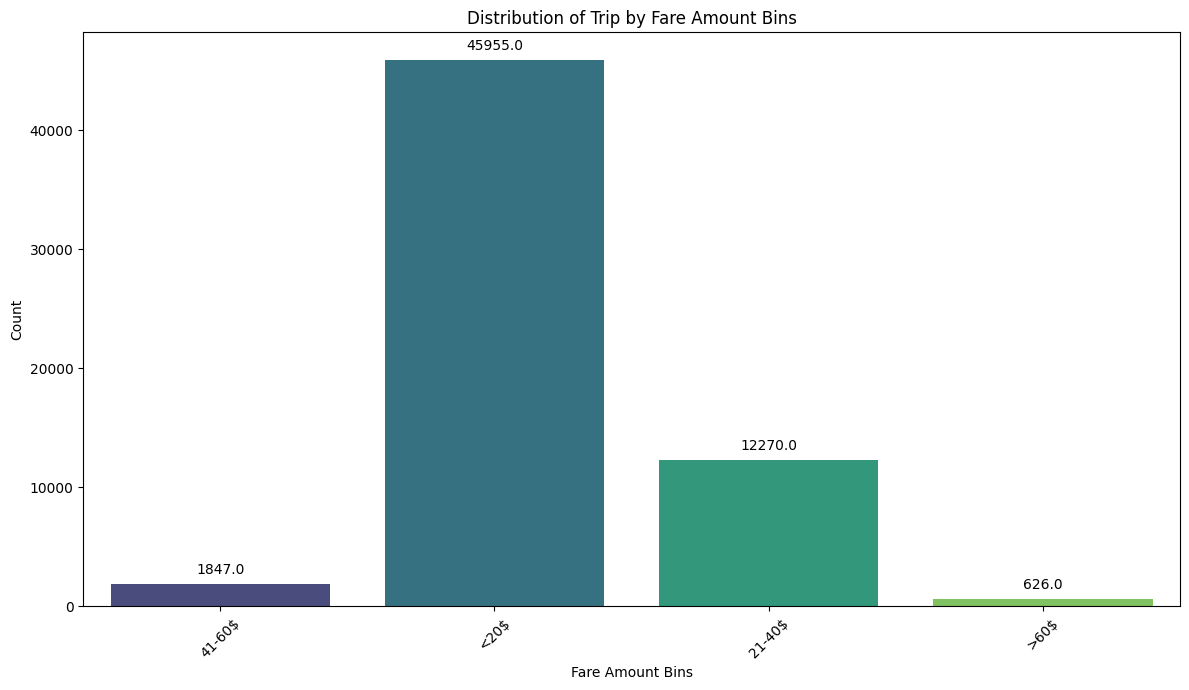

In [20]:
plt.figure(figsize=(12, 7))
sns.countplot(x='fare_amount_bins', data=df, palette='viridis')
plt.title('Distribution of Trip by Fare Amount Bins')
plt.xlabel('Fare Amount Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

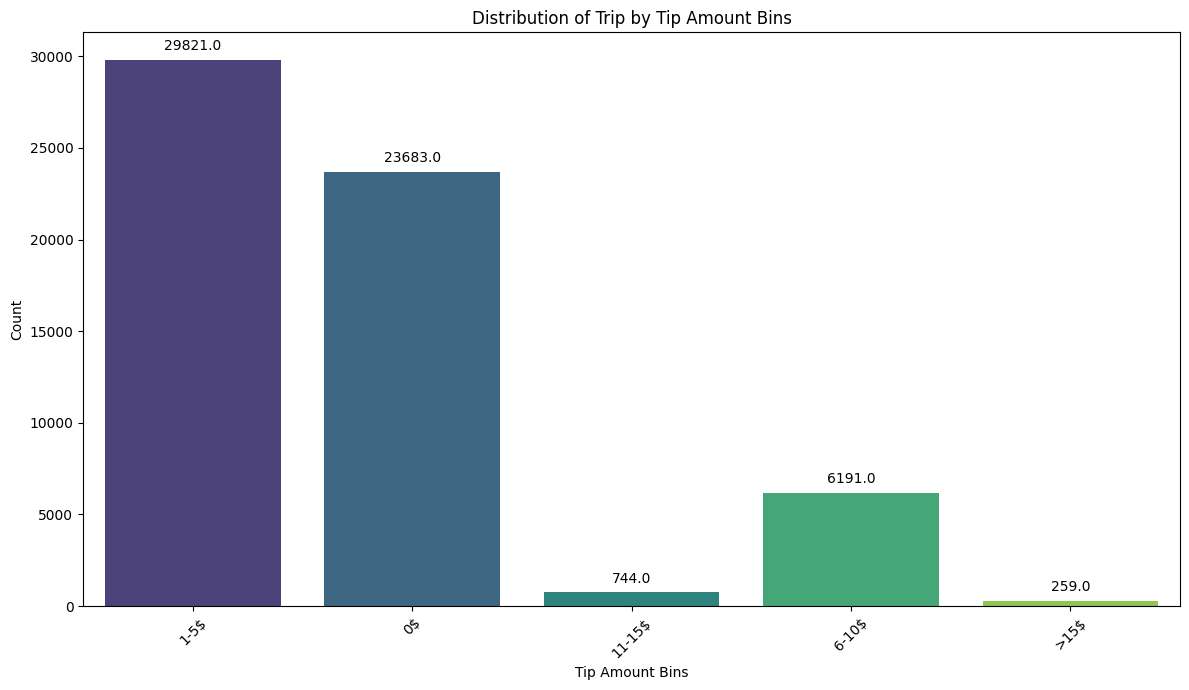

In [21]:
plt.figure(figsize=(12, 7))
sns.countplot(x='tip_amount_bins', data=df, palette='viridis')
plt.title('Distribution of Trip by Tip Amount Bins')
plt.xlabel('Tip Amount Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

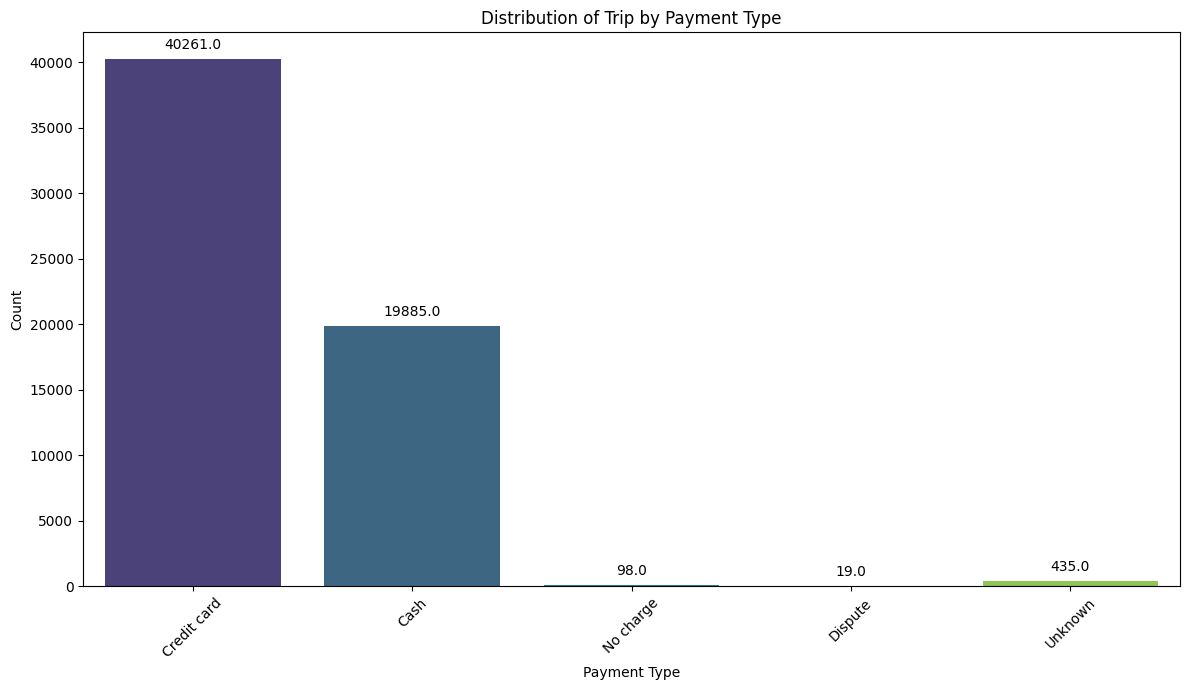

In [22]:
plt.figure(figsize=(12, 7))
sns.countplot(x='payment_type', data=df, palette='viridis')
plt.title('Distribution of Trip by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

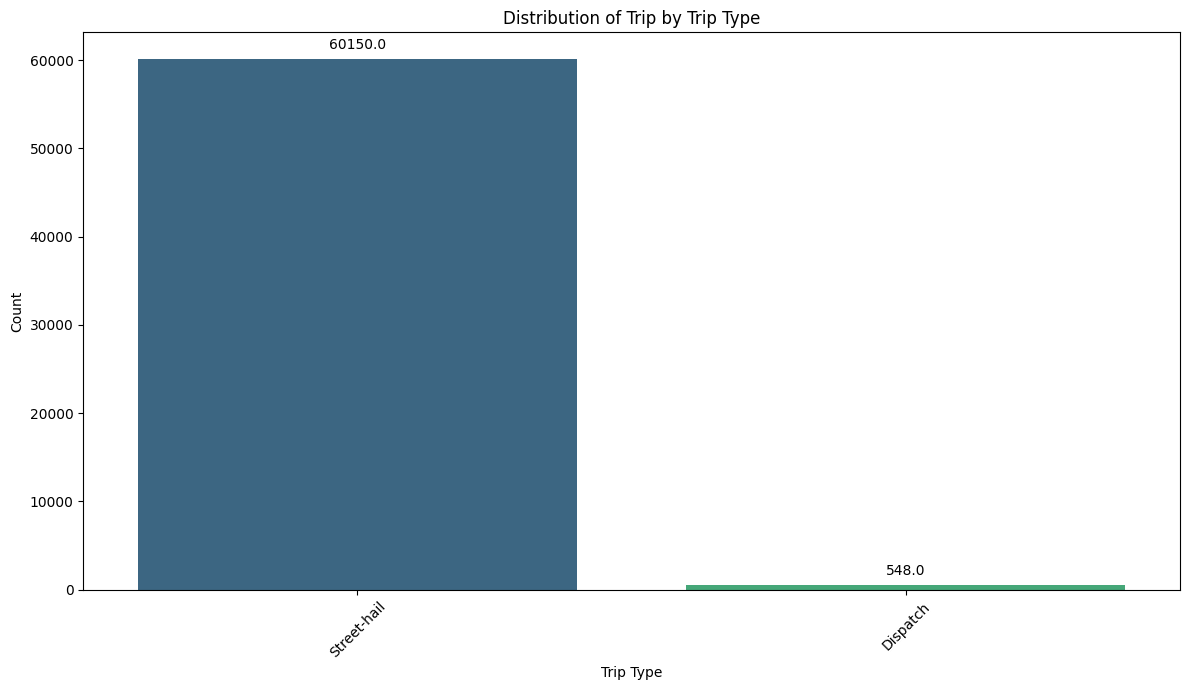

In [23]:
plt.figure(figsize=(12, 7))
sns.countplot(x='trip_type', data=df, palette='viridis')
plt.title('Distribution of Trip by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

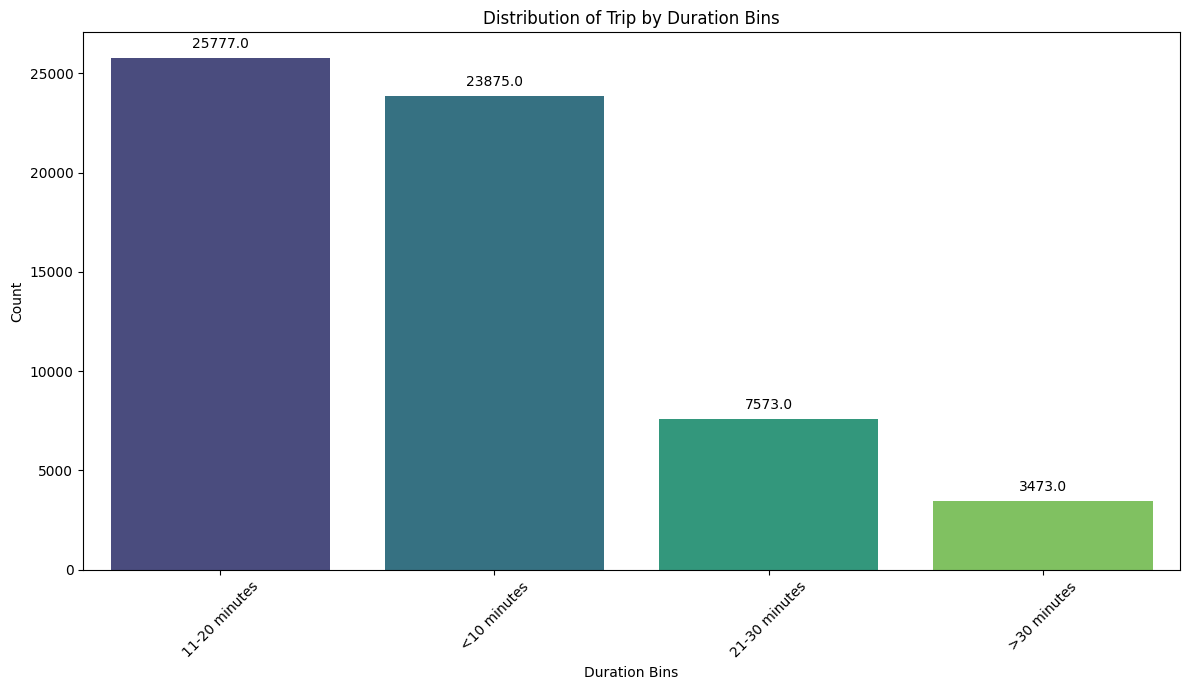

In [24]:
plt.figure(figsize=(12, 7))
sns.countplot(x='duration_bins', data=df, palette='viridis')
plt.title('Distribution of Trip by Duration Bins')
plt.xlabel('Duration Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

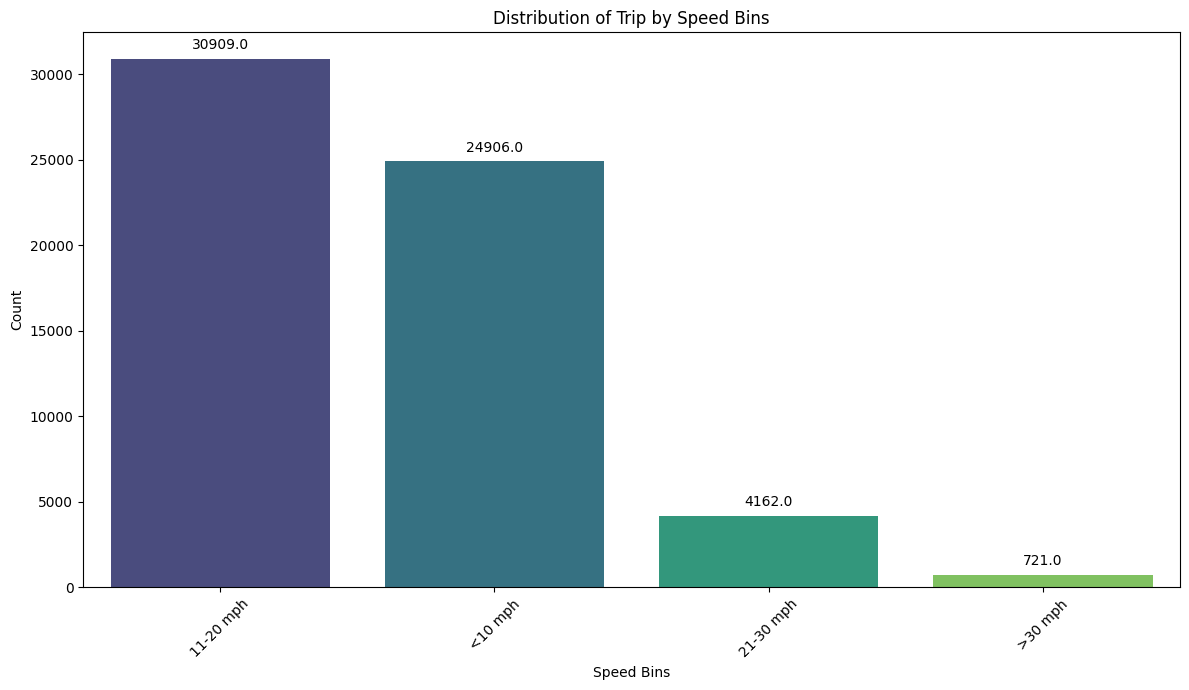

In [25]:
plt.figure(figsize=(12, 7))
sns.countplot(x='speed_bins', data=df, palette='viridis')
plt.title('Distribution of Trip by Speed Bins')
plt.xlabel('Speed Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

---

## Data Numerical

In [26]:
df.describe()

,PULocationID,DOLocationID,trip_distance,fare_amount,tip_amount,trip_duration,speed
count,60698.000000,60698.000000,60698.000000,60698.000000,60698.000000,60698.000000,60698.000000
mean,97.288955,139.758163,2.909836,16.818791,2.259730,14.041099,12.118648
std,59.656318,76.075902,2.646537,11.162003,2.710869,9.161107,5.158949
min,3.000000,1.000000,0.630000,0.010000,0.000000,2.016667,5.000000
25%,74.000000,74.000000,1.330000,10.000000,0.000000,7.916667,8.830000
50%,75.000000,140.000000,2.040000,13.500000,2.000000,11.733333,10.770000
75%,116.000000,223.000000,3.450000,19.800000,3.500000,17.429167,13.820000
max,263.000000,263.000000,41.740000,348.100000,50.000000,115.216667,60.160000


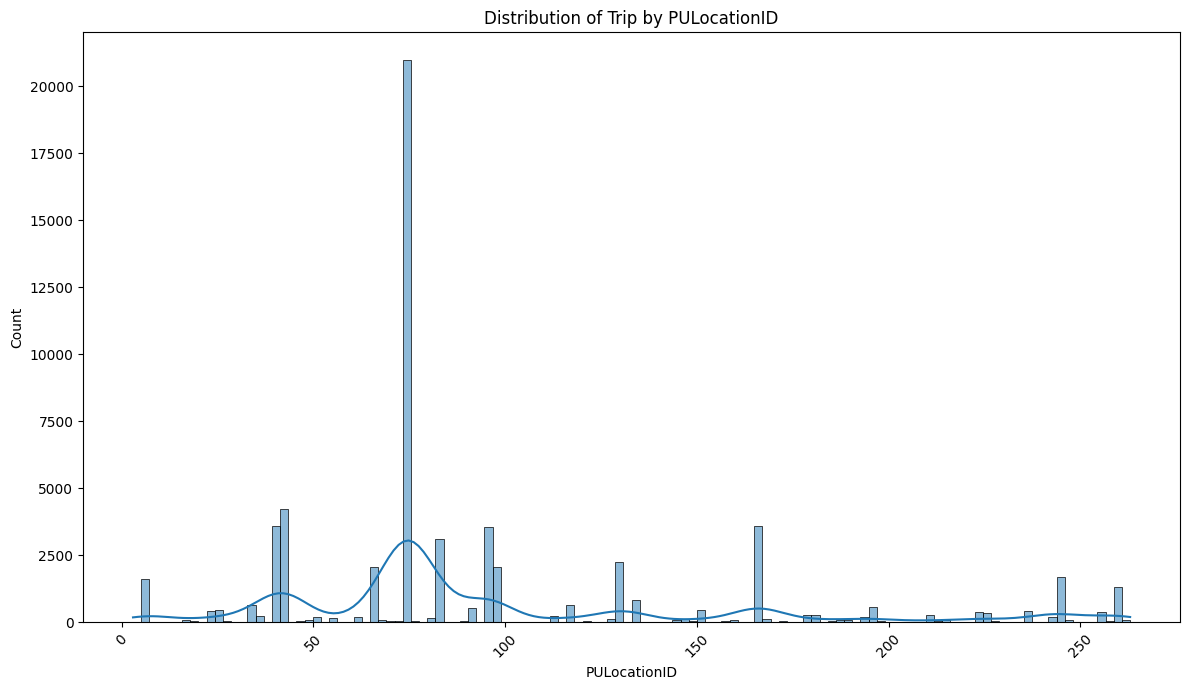

In [27]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='PULocationID', palette='viridis', kde=True)  # kde=True to show the kernel density estimate
plt.title('Distribution of Trip by PULocationID')
plt.xlabel('PULocationID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

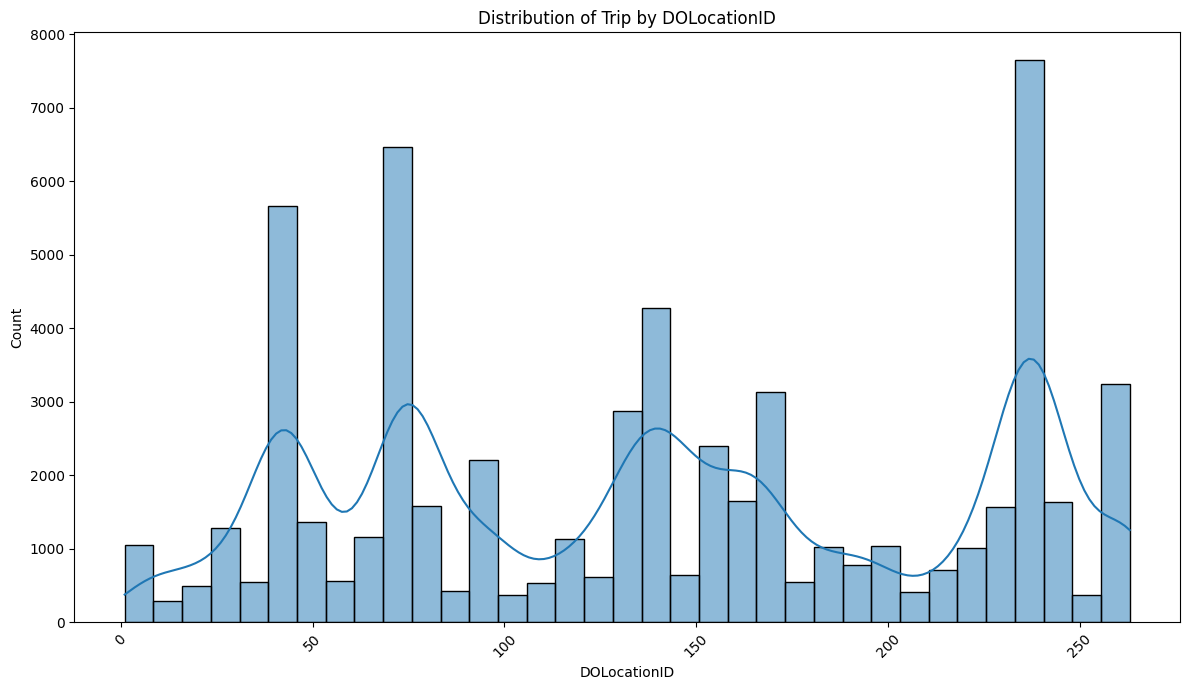

In [28]:
plt.figure(figsize=(12, 7))
sns.histplot(x='DOLocationID', data=df, kde=True)
plt.title('Distribution of Trip by DOLocationID')
plt.xlabel('DOLocationID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

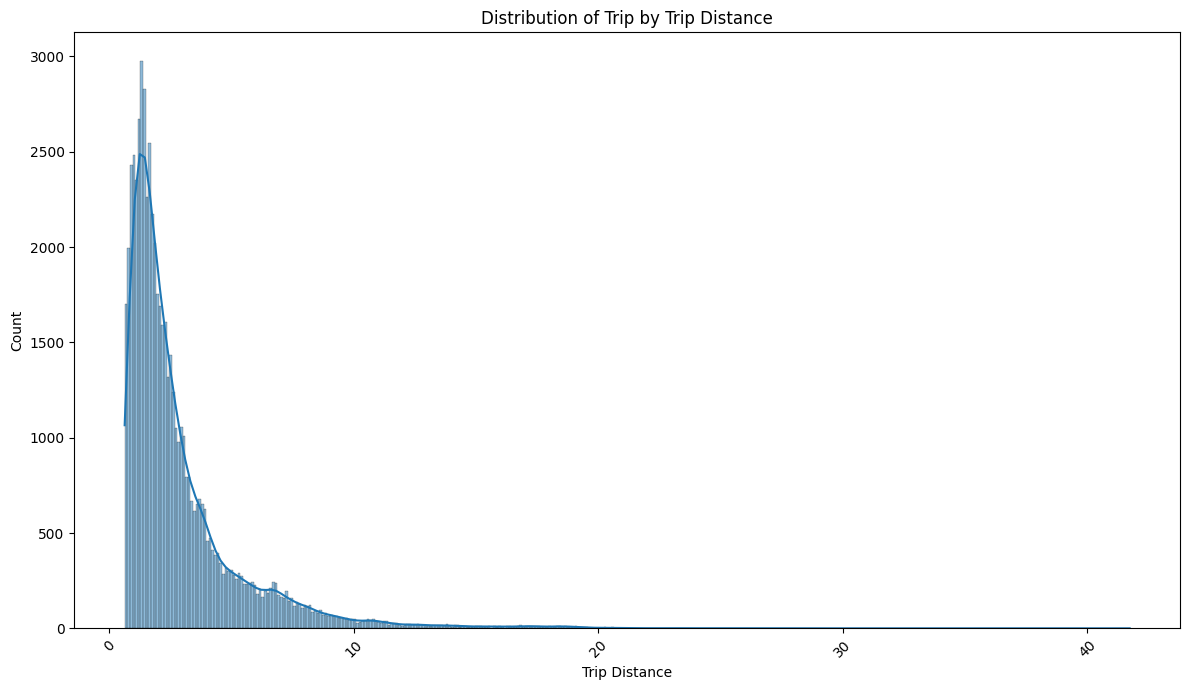

In [29]:
plt.figure(figsize=(12, 7))
sns.histplot(x='trip_distance', data=df, kde=True)
plt.title('Distribution of Trip by Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

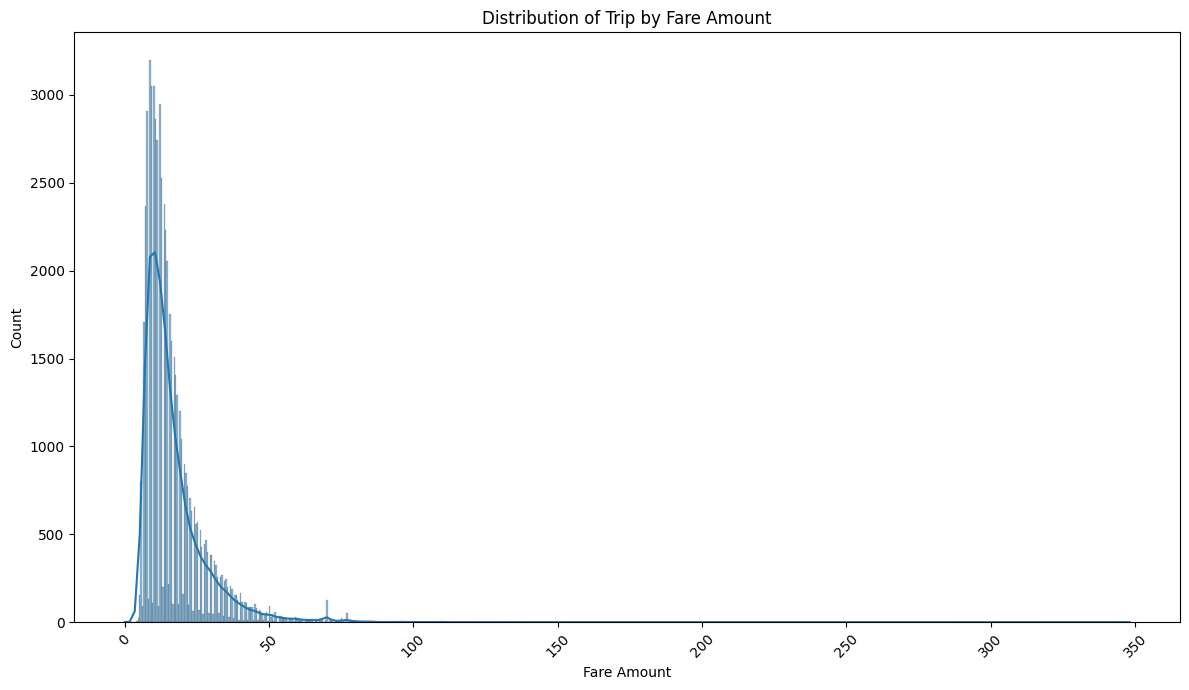

In [30]:
plt.figure(figsize=(12, 7))
sns.histplot(x='fare_amount', data=df, kde=True)
plt.title('Distribution of Trip by Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

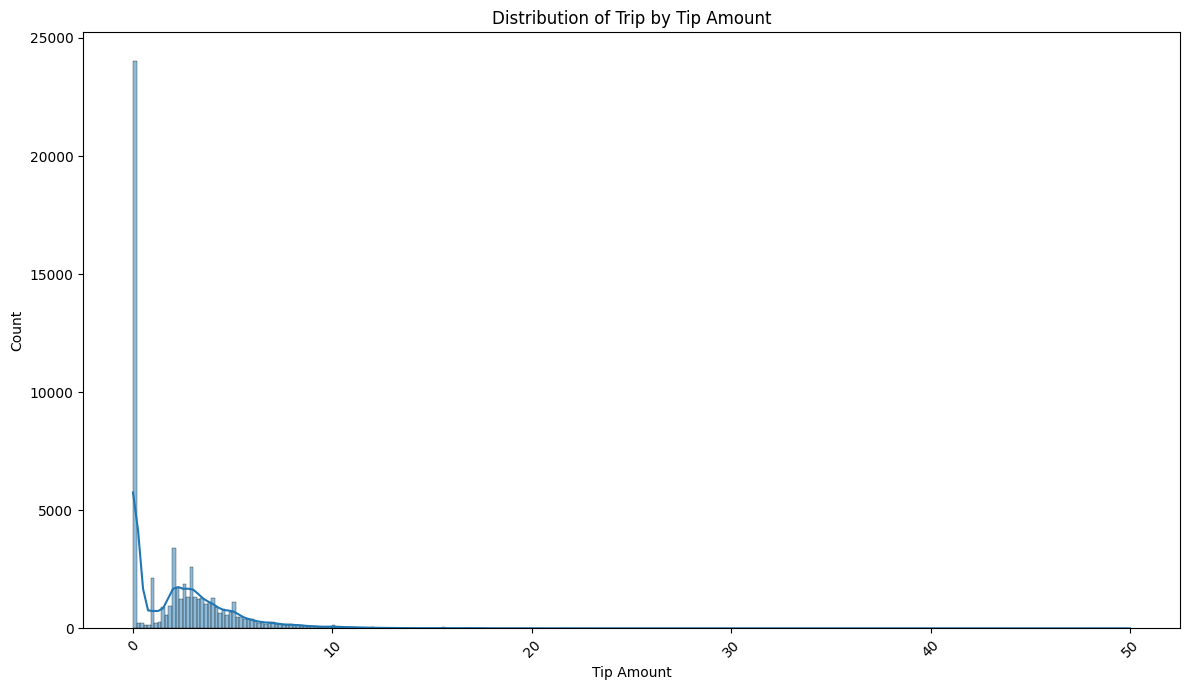

In [31]:
plt.figure(figsize=(12, 7))
sns.histplot(x='tip_amount', data=df, kde=True)
plt.title('Distribution of Trip by Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

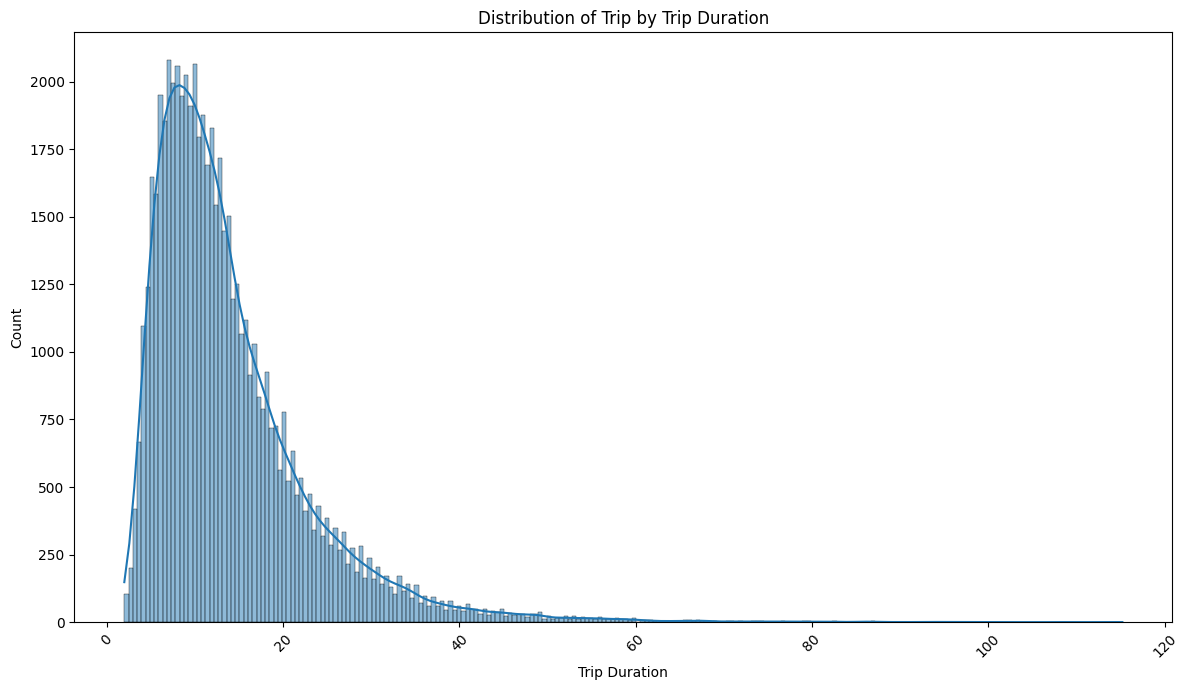

In [32]:
plt.figure(figsize=(12, 7))
sns.histplot(x='trip_duration', data=df, kde=True)
plt.title('Distribution of Trip by Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

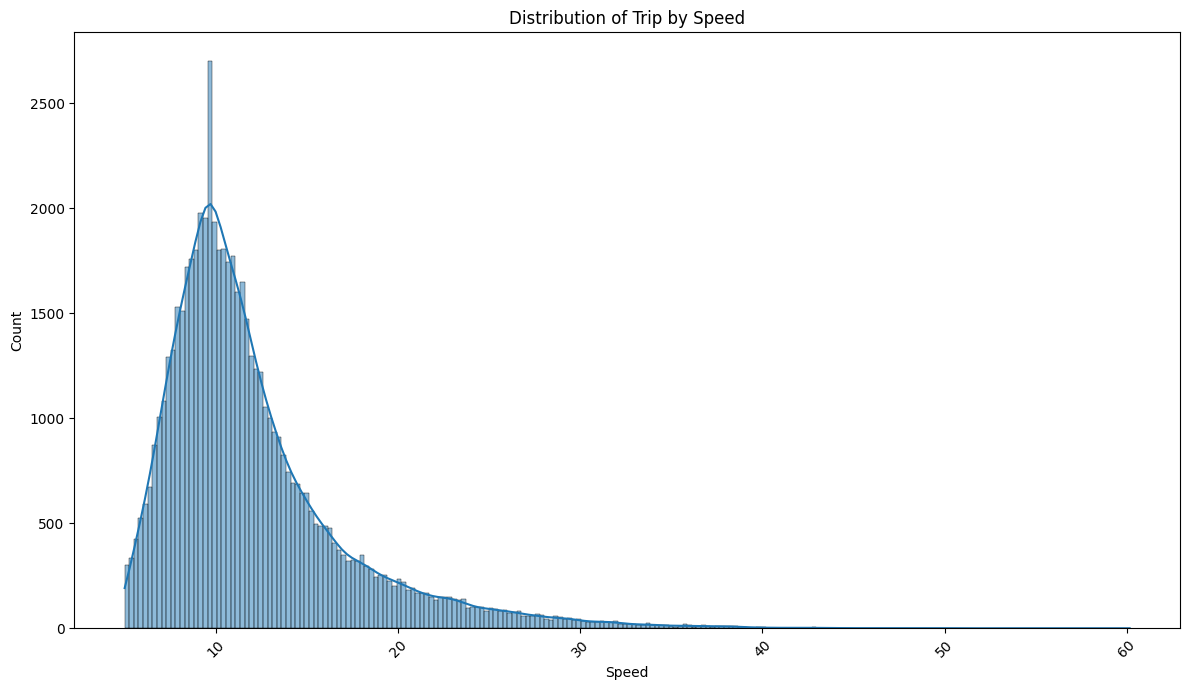

In [33]:
plt.figure(figsize=(12, 7))
sns.histplot(x='speed', data=df, kde=True)
plt.title('Distribution of Trip by Speed')
plt.xlabel('Speed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Insight`

- Tidak ada data yang terdistribusi normal
- Mayoritas data memiliki distribusi right skewed
---

# Data Analysis

In [34]:
df.dtypes

,0
lpep_pickup_datetime,object
lpep_dropoff_datetime,object
day_category,object
pickup_time,object
RatecodeID,object
PULocationID,int64
PUBorough,object
PUZone,object
DOLocationID,int64
DOBorough,object


In [35]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

## Trip Demand Based on Time

In [36]:
trip_day = df.groupby(df['lpep_pickup_datetime'].dt.date).agg(trip_bydate=('lpep_pickup_datetime', 'count')).reset_index()
trip_day['lpep_pickup_datetime'] = pd.to_datetime(trip_day['lpep_pickup_datetime'])
trip_day['day_of_week'] = trip_day['lpep_pickup_datetime'].dt.day_name()
trip_day

,lpep_pickup_datetime,trip_bydate,day_of_week
0,2023-01-01,1312,Sunday
1,2023-01-02,1400,Monday
2,2023-01-03,1880,Tuesday
3,2023-01-04,2104,Wednesday
4,2023-01-05,2171,Thursday
5,2023-01-06,2249,Friday
6,2023-01-07,1919,Saturday
7,2023-01-08,1473,Sunday
8,2023-01-09,1957,Monday
9,2023-01-10,1934,Tuesday


In [37]:
trip_daily = trip_day.groupby('day_of_week').agg(trip_byday=('trip_bydate', 'sum'), day_count=('day_of_week', 'count'), avg_trip=('trip_bydate', 'mean')).reset_index()
trip_daily['day_category']= trip_daily['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')
trip_daily_category = trip_daily.groupby('day_category').agg(trip_by_category=('trip_byday', 'sum')).reset_index()
trip_daily_category

,day_category,trip_by_category
0,Weekdays,45645
1,Weekend,15053


In [38]:
trip_merge = pd.merge(trip_day, trip_daily, on='day_of_week', how='left')
trip_merge = pd.merge(trip_merge, trip_daily_category, on='day_category', how='left')
trip_merge

,lpep_pickup_datetime,trip_bydate,day_of_week,trip_byday,day_count,avg_trip,day_category,trip_by_category
0,2023-01-01,1312,Sunday,7462,5,1492.40,Weekend,15053
1,2023-01-02,1400,Monday,8893,5,1778.60,Weekdays,45645
2,2023-01-03,1880,Tuesday,10023,5,2004.60,Weekdays,45645
3,2023-01-04,2104,Wednesday,8723,4,2180.75,Weekdays,45645
4,2023-01-05,2171,Thursday,9101,4,2275.25,Weekdays,45645
5,2023-01-06,2249,Friday,8905,4,2226.25,Weekdays,45645
6,2023-01-07,1919,Saturday,7591,4,1897.75,Weekend,15053
7,2023-01-08,1473,Sunday,7462,5,1492.40,Weekend,15053
8,2023-01-09,1957,Monday,8893,5,1778.60,Weekdays,45645
9,2023-01-10,1934,Tuesday,10023,5,2004.60,Weekdays,45645


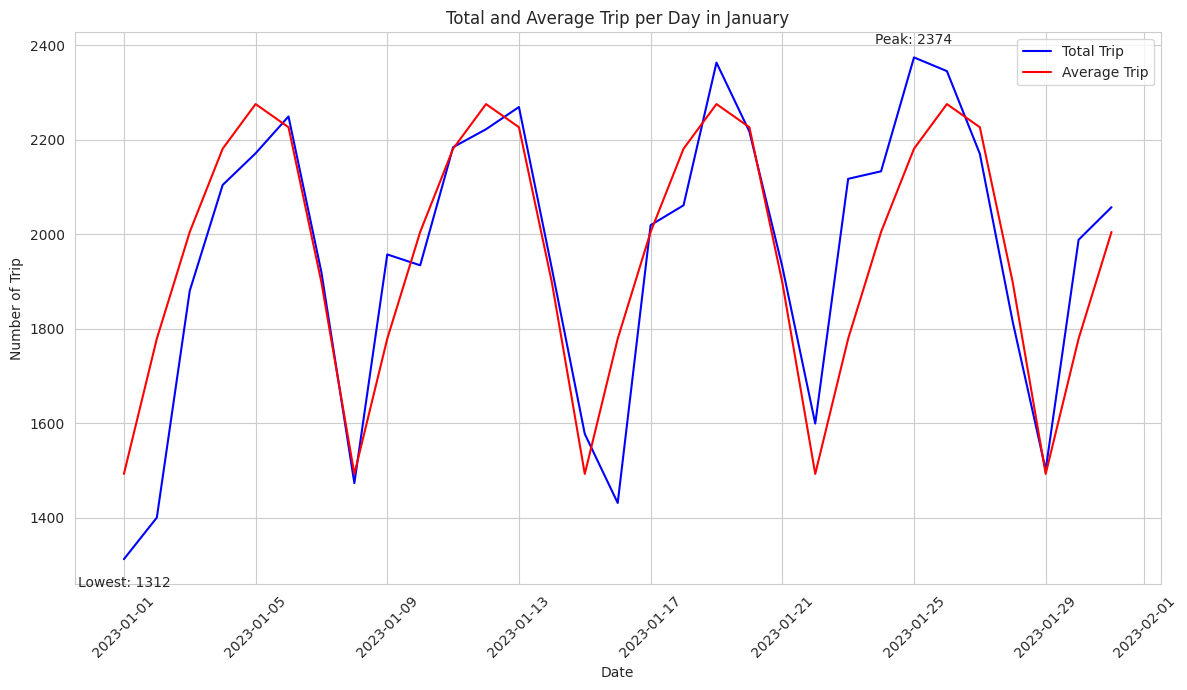

In [90]:
plt.figure(figsize=(12, 7))

# Plot Total Trip per Day
sns.set_style('whitegrid')
sns.lineplot(data=trip_merge, x='lpep_pickup_datetime', y='trip_bydate', color='blue', label='Total Trip')

# Plot Average Trip per Day
sns.lineplot(data=trip_merge, x='lpep_pickup_datetime', y='avg_trip', color='red', label='Average Trip')

# Find and annotate peak and lowest points for Total Trip
peak_index = trip_merge['trip_bydate'].idxmax()
lowest_index = trip_merge['trip_bydate'].idxmin()
plt.annotate(f"Peak: {trip_merge['trip_bydate'][peak_index]}",
             (trip_merge['lpep_pickup_datetime'][peak_index], trip_merge['trip_bydate'][peak_index]),
             textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f"Lowest: {trip_merge['trip_bydate'][lowest_index]}",
             (trip_merge['lpep_pickup_datetime'][lowest_index], trip_merge['trip_bydate'][lowest_index]),
             textcoords="offset points", xytext=(0,-20), ha='center')


plt.title('Total and Average Trip per Day in January')
plt.xlabel('Date')
plt.ylabel('Number of Trip')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

`Insight`
- Jumlah perjalanan taksi tertinggi terjadi pada tanggal 24 Januari 2023
- Jumlah perjalanan taksi terendah terjadi pada tanggal 1 Januari 2023
- Terlihat adanya pola mingguan  yang cukup konsisten di mana jumlah perjalanan cenderung menurun drastis pada hari-hari tertentu, yang kemungkinan adalah pada akhir pekan.

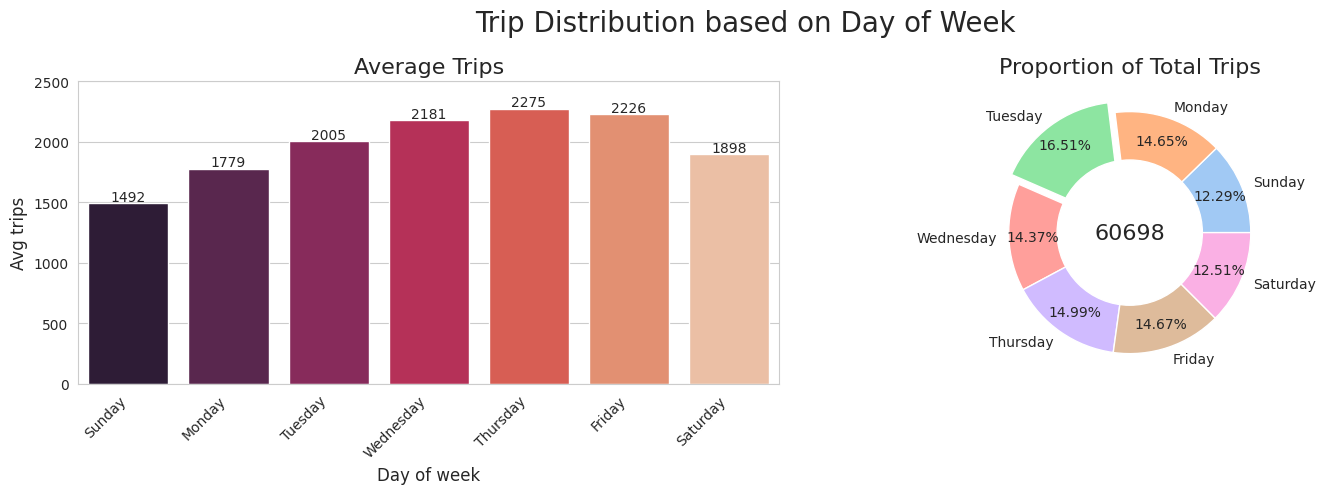

In [40]:
plt.figure(figsize=(15, 5))
plt.suptitle('Trip Distribution based on Day of Week', fontsize=20)

plt.subplot(1, 2, 1)
sns.set_style("darkgrid")
bars = sns.barplot(x=trip_merge['day_of_week'].unique().tolist(),
            y=trip_merge['avg_trip'].unique().tolist(),
            palette="rocket")
plt.title('Average Trips', fontsize=16)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Avg trips', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(np.arange(0, 2501, 500))

for idx, bar in enumerate(bars.patches):
  x_value = bar.get_x() + bar.get_width() / 2
  y_value = bar.get_height() + 20
  label = "{:.0f}".format(trip_merge['avg_trip'].iloc[idx])
  plt.text(x_value, y_value, label, ha='center', fontsize=10)

plt.subplot(1, 2, 2)
explode = [0.1 if i == 2 else 0 for i in range(len(trip_merge['day_of_week'].unique()))]
plt.pie(x=trip_merge['trip_byday'].unique().tolist(),
        labels=trip_merge['day_of_week'].unique().tolist(),
        pctdistance=0.8,
        autopct='%1.2f%%',
        explode=explode,
        colors=sns.color_palette("pastel"))
centre_circle = plt.Circle((0, 0), 0.6, fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.text(0, 0, trip_merge['trip_byday'].unique().sum(), ha='center', va='center', fontsize=16)
plt.title('Proportion of Total Trips', fontsize=16)

plt.tight_layout()
plt.show()

`Insight`

Bar Chart

1. Puncak aktivitas:
- Hari Kamis memiliki jumlah perjalanan rata-rata tertinggi, yaitu **2275 perjalanan**, diikuti oleh Hari Jumat dengan **2226 perjalanan**.
- Hari-hari tersebut menunjukkan puncak aktivitas tranportasi, kemungkinan karena tingginya kebutuhan perjalanan untuk keperluan kerja atau aktivitas menjelang akhir pekan.

2. Penurunan perjalanan pada saat weekend:
- Hari Minggu memiliki rata-rata perjalanan terendah, yaitu **1492 perjalanan**, dan Hari Sabtu juga terlihat adanya penurunan dengan rata-rata **1898 perjalanan**
- Hal ini mengindikasikan bahwa aktivitas perjalanan lebih rendah pada akhir pekan, yang mungkin disebabkan oleh sedikitnya keperluan perjalanan rutin (misalnya, ke kantor atau ke sekolah)

3. Weekdays vs Weekend:
- Aktivitas perjalanan secara konsisten lebih tinggi pada hari kerja (Senin hingga Jumat) dibandingkan akhir pekan.


Pie Chart

1. Distribusi Proporsional:
- Hari Selasa menyumbang **16.51%** dari total perjalanan, tertinggi dibandingkan hari-hari lainnya.
- Hari Minggu menyumbang proporsi terendah, yaitu **12.29%**, mengkonfirmasi insight dari bar chart bahwa aktivitas perjalanan berkurang signifikan di akhir pekan.

2. Keseimbangan antar hari kerja:
- Proporsi perjalanan pada hari kerja relatif seimbang, persentase yang mirip (di atas 14%) dengan Kamis memiliki persentase tertinggi (16.51%)


In [41]:
trip_hourly = df.groupby([df['lpep_pickup_datetime'].dt.hour, 'pickup_time']).agg(trip_byhour=('lpep_pickup_datetime', 'count')).reset_index()
trip_hourly

,lpep_pickup_datetime,pickup_time,trip_byhour
0,0,Midnight,993
1,1,Midnight,765
2,2,Midnight,542
3,3,Midnight,467
4,4,Midnight,370
5,5,Morning,357
6,6,Morning,893
7,7,Morning,2369
8,8,Morning,2863
9,9,Morning,3129


In [42]:
trip_bytimecat = df.groupby('pickup_time').agg(trip_bytime=('pickup_time', 'count')).reset_index()
trip_bytimecat

,pickup_time,trip_bytime
0,Evening,22572
1,Midnight,3137
2,Morning,12832
3,Night,8110
4,Noon,14047


In [43]:
trip_time_merge = pd.merge(trip_hourly, trip_bytimecat, on='pickup_time', how='left')
trip_time_merge

,lpep_pickup_datetime,pickup_time,trip_byhour,trip_bytime
0,0,Midnight,993,3137
1,1,Midnight,765,3137
2,2,Midnight,542,3137
3,3,Midnight,467,3137
4,4,Midnight,370,3137
5,5,Morning,357,12832
6,6,Morning,893,12832
7,7,Morning,2369,12832
8,8,Morning,2863,12832
9,9,Morning,3129,12832


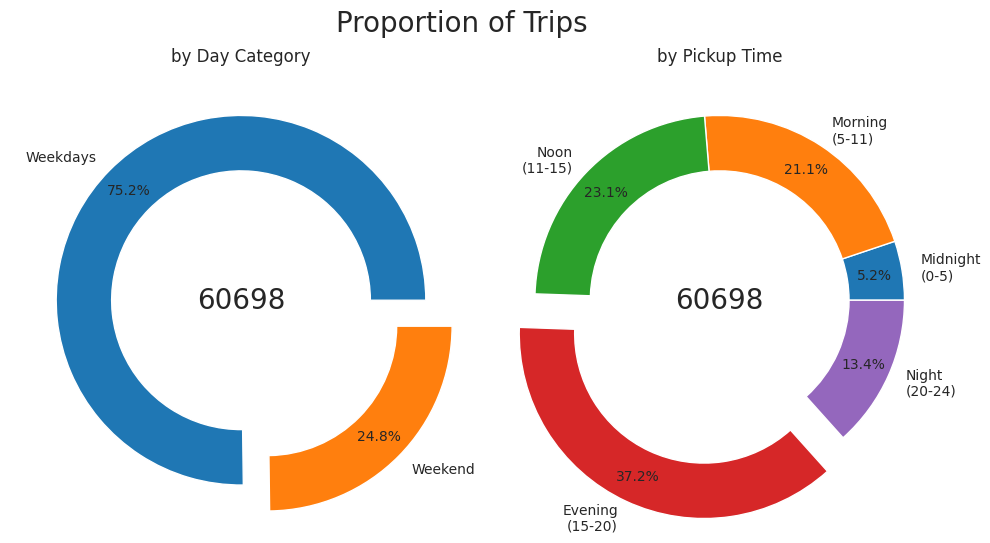

In [44]:
plt.figure(figsize=(15, 6))
plt.suptitle('Proportion of Trips', fontsize=20)

plt.subplot(1, 2, 1)
plt.pie(x=trip_daily_category['trip_by_category'].unique().tolist(),
        labels=trip_daily_category['day_category'].unique().tolist(),
        pctdistance=0.85,
        autopct='%1.1f%%',
        explode=(0, 0.2),
        wedgeprops=dict(width=0.3))

plt.text(0, 0, trip_merge['trip_bydate'].sum(), ha='center', va='center', fontsize=20)
plt.title('by Day Category')

plt.subplot(1, 2, 2)
labels = [f"{trip_time_merge['pickup_time'].unique().tolist()[0]}\n(0-5)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[1]}\n(5-11)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[2]}\n(11-15)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[3]}\n(15-20)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[4]}\n(20-24)"]

plt.pie(x=trip_time_merge['trip_bytime'].unique().tolist(),
        labels=labels,
        pctdistance=0.85,
        autopct='%1.1f%%',
        explode=(0, 0, 0, 0.2, 0),
        wedgeprops=dict(width=0.3))

plt.text(0, 0, trip_time_merge['trip_byhour'].sum(), ha='center', va='center', fontsize=20)
plt.title('by Pickup Time')

plt.subplots_adjust(wspace=-0.3)
plt.show()

`Insights`

1. Proportion of Trips by Day Category (Weekdays vs Weekend)

- Dominasi Hari Kerja:
  - Sebagian besar perjalanan (75.2%) terjadi pada hari kerja (weekdays).
  - Akhir pekan (weekend) hanya menyumbang 24.8% dari total perjalanan, menunjukkan penurunan aktivitas transportasi pada Sabtu dan Minggu.

- Interpretasi:
Aktivitas perjalanan lebih tinggi pada hari kerja, kemungkinan besar disebabkan oleh rutinitas pekerjaan, sekolah, dan kebutuhan transportasi umum lainnya.

2. Proportion of Trips by Time Category

- Jam Puncak di Malam Hari:
  - Waktu petang (15:00-20:00) menyumbang proporsi tertinggi dari total perjalanan, yaitu 37.2%
  - Hal ini kemungkinan besar mencerminkan jam pulang kerja atau aktivitas sosial di sore hingga malam hari.

- Waktu Siang Hari:
  - Waktu siang (11:00 - 15:00) berada pada urutan kedua dengan 23.1%, menandakan tingginya aktivitas transportasi pada jam-jam tersebut.

- Pagi dan Malam Larut:
  - Pagi (5:00 - 11:00) memiliki proporsi yang signifikan, yaitu 21.1%, menunjukkan aktivitas transportasi yang cukup tinggi di pagi hari, mungkin karena perjalanan menuju tempat kerja atau sekolah.
  - Malam larut (20:00 - 24:00) dan dini hari (0:00 - 5:00) memiliki proporsi yang lebih kecil, masing-masing 13.4% dan 5.2%. Hal ini menunjukkan bahwa permintaan perjalanan cenderung menurun setelah pukul 20:00.

In [45]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cross = pd.crosstab(index=df['lpep_pickup_datetime'].dt.day_name(), columns=df['lpep_pickup_datetime'].dt.hour, margins=True).reindex(day_order)
cross.columns.name = None
cross.index.name = 'Day of Week'

melted_cross = cross.iloc[:,:-1].reset_index().melt(id_vars='Day of Week', var_name='hour', value_name='trips')
cross

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,281,264,221,181,137,74,59,96,123,217,324,425,475,490,503,562,539,507,518,442,379,293,193,159,7462
Monday,110,67,49,62,52,51,134,375,418,482,484,508,525,565,580,695,704,704,724,552,378,305,218,151,8893
Tuesday,85,50,44,35,21,51,186,531,648,647,572,529,548,536,650,722,784,775,796,629,456,323,242,163,10023
Wednesday,84,66,27,25,17,43,165,406,510,518,504,452,430,470,535,651,689,747,733,601,408,279,211,152,8723
Thursday,88,61,41,25,31,51,163,424,505,544,508,496,466,498,589,658,699,760,793,543,444,309,240,165,9101
Friday,135,81,38,36,28,42,140,429,463,469,475,454,413,446,594,695,688,710,718,568,421,321,290,251,8905
Saturday,210,176,122,103,84,45,46,108,196,252,354,434,468,514,454,581,567,510,533,475,419,324,315,301,7591


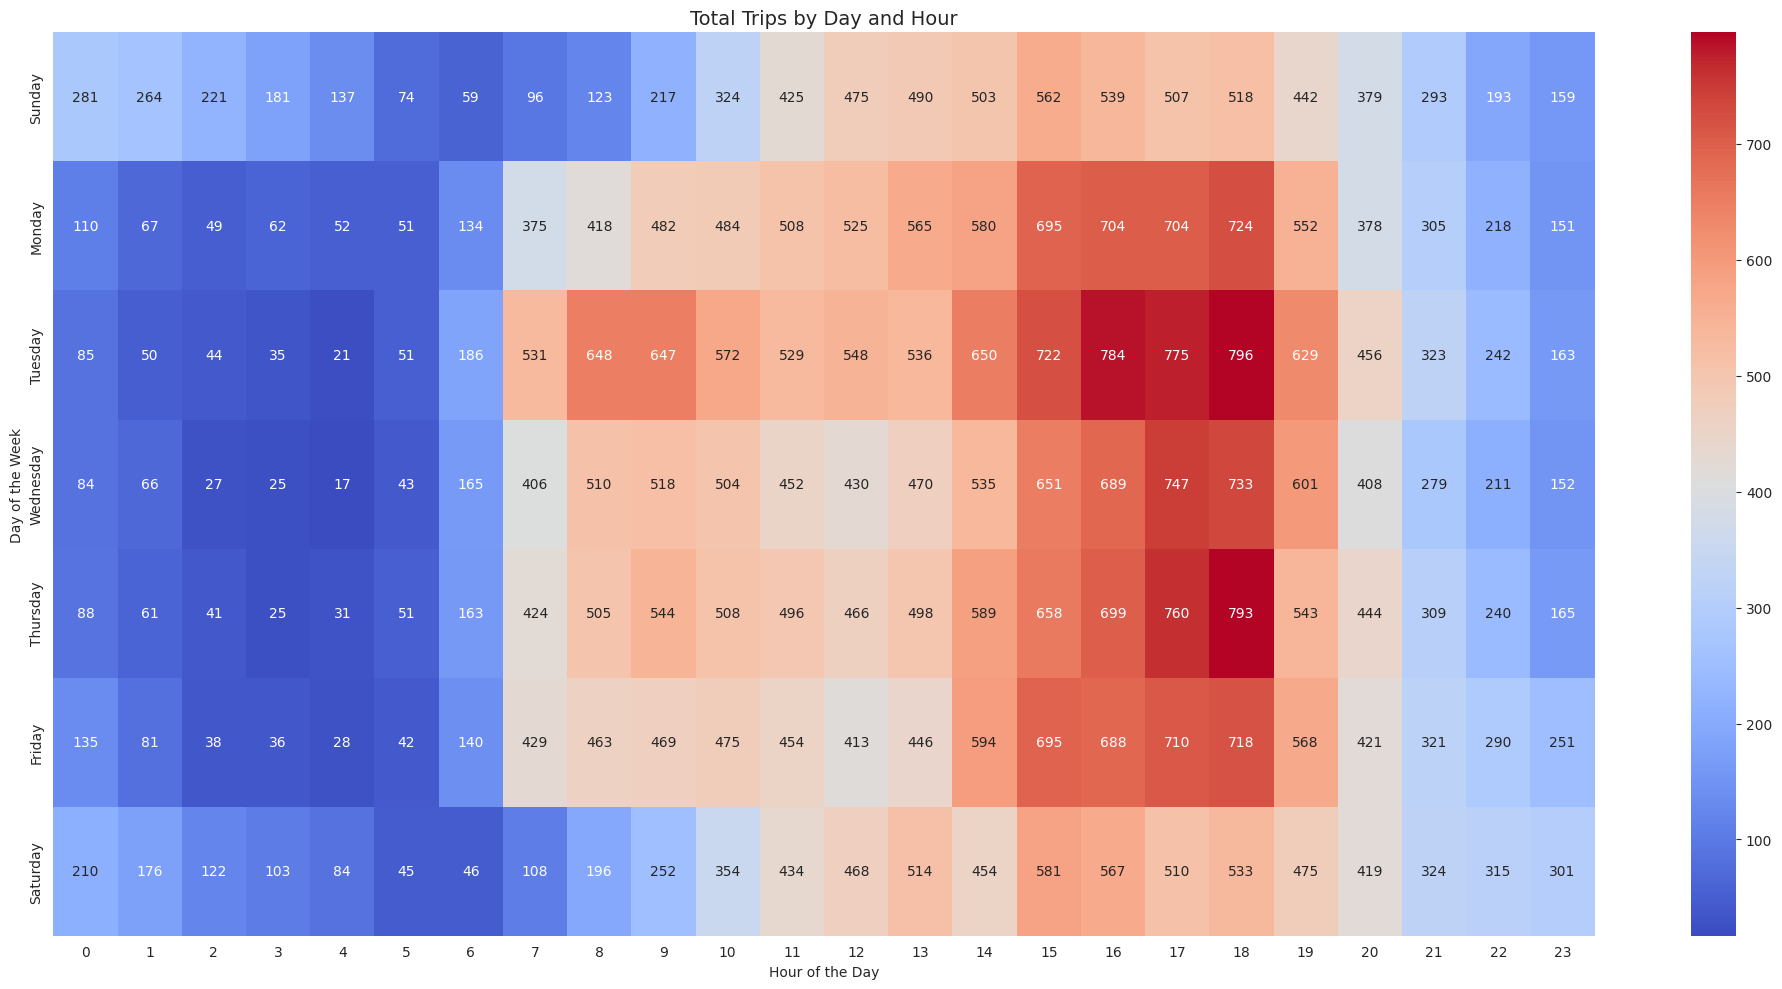

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(cross.iloc[:,:-1], cmap="coolwarm", annot=True, fmt='d')
plt.title('Total Trips by Day and Hour', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()

`Insights`

Heatmap Total Trips by Day and Hour

- Distribusi Perjalanan Berdasarkan Jam:

- Pagi (07:00 - 09:00):

  - Lonjakan signifikan terlihat pada hari kerja, terutama pada Selasa, Rabu, Kamis, dan Jumat, dengan jumlah perjalanan mencapai lebih dari 700 trip per jam.

- Sore (16:00 - 19:00):

  - Perjalanan sore mencapai puncaknya pada 17:00 hingga 18:00, terutama pada hari Selasa hingga Jumat, dengan nilai maksimum sekitar 796 trip per jam.

- Hari Libur (Weekend):

  - Aktivitas perjalanan di akhir pekan terlihat lebih tersebar, tanpa puncak yang sangat tajam seperti hari kerja. Namun, masih ada peningkatan perjalanan di siang dan sore hari.

- Jam Non-Puncak (Malam dan Dini Hari):

  - Perjalanan pada malam dan dini hari (21:00 - 05:00) memiliki jumlah yang jauh lebih sedikit di semua hari, terutama pada jam 03:00 hingga 05:00, di mana jumlah perjalanan minimal.

## Trip by PUBorough and PUZone

In [47]:
agg_borough = df.groupby('PUBorough').agg(count=('PUBorough', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_zone = df.groupby('PUZone').agg(count=('PUZone', 'count')).sort_values(by='count', ascending=False).reset_index()

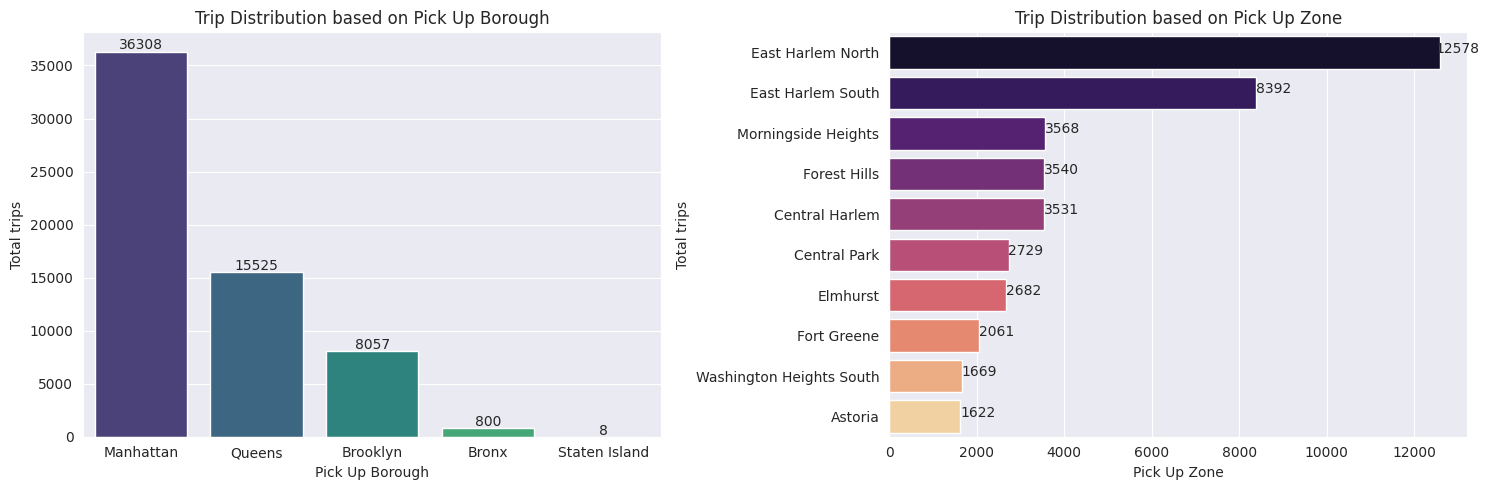

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bars = sns.barplot(x=agg_borough['PUBorough'],
                   y=agg_borough['count'], palette="viridis")
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(agg_borough['count'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')
plt.title('Trip Distribution based on Pick Up Borough')
plt.xlabel('Pick Up Borough')
plt.ylabel('Total trips')

plt.subplot(1,2,2)
bars = sns.barplot(data=agg_zone.head(10),
                   y='PUZone',
                   x='count', palette="magma")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(agg_zone['count'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')
plt.title('Trip Distribution based on Pick Up Zone')
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')
plt.tight_layout()
plt.show()

`Insight`

1. Distribusi Berdasarkan Borough:
  - Manhattan memiliki jumlah trip tertinggi dengan 36.308 trip.
  - Queens berada di posisi kedua dengan 15.525 trip.
  - Brooklyn memiliki 8.057 trip.
  - Bronx dan Staten Island memiliki jumlah trip yang sangat rendah, masing-masing 800 dan 8 trip.

2. Distribusi Berdasarkan Zona:
  - East Harlem North adalah zona dengan trip terbanyak, yaitu 12.578 trip.
  - East Harlem South menyusul dengan 8.392 trip.
  - Zona lain seperti Morningside Heights, Forest Hills, dan Central Harlem memiliki jumlah trip yang lebih rendah, berkisar antara 3.500 hingga 3.568 trip.

## Trip by DOBorough and DOZone

In [49]:
agg_borough_DO = df.groupby('DOBorough').agg(count=('DOBorough', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_zone_DO = df.groupby('DOZone').agg(count=('DOZone', 'count')).sort_values(by='count', ascending=False).reset_index()

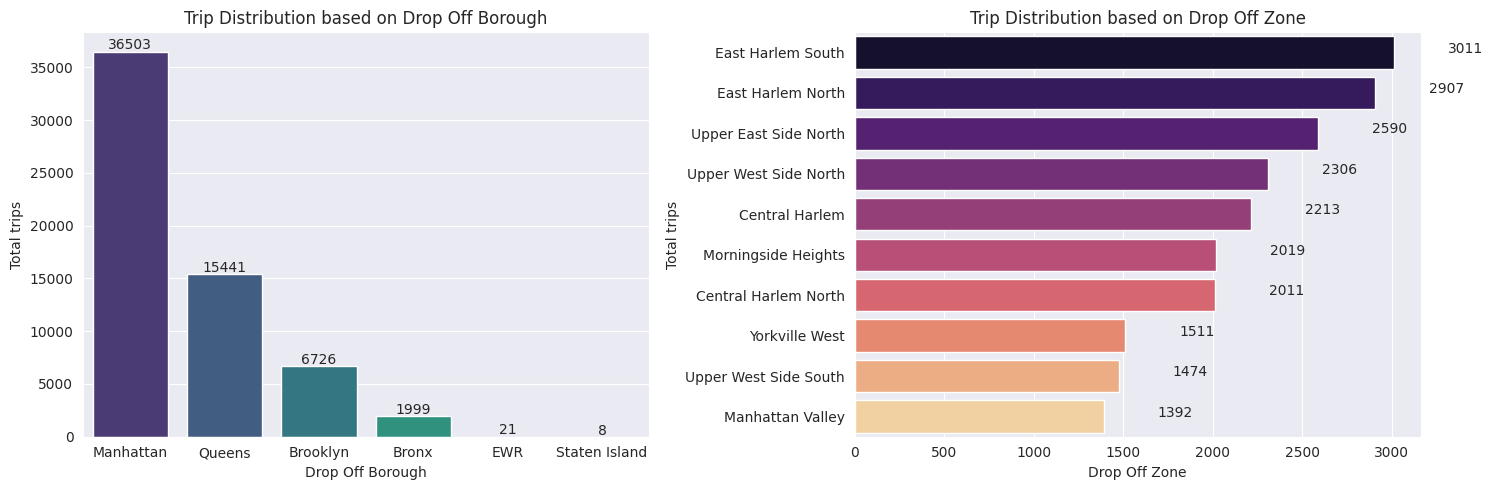

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
bars = sns.barplot(x=agg_borough_DO['DOBorough'],
                   y=agg_borough_DO['count'], palette="viridis")
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(agg_borough_DO['count'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')
plt.title('Trip Distribution based on Drop Off Borough')
plt.xlabel('Drop Off Borough')
plt.ylabel('Total trips')

plt.subplot(1,2,2)
bars = sns.barplot(data=agg_zone_DO.head(10),
                   y='DOZone',
                   x='count', palette="magma")
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(agg_zone_DO['count'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')
plt.title('Trip Distribution based on Drop Off Zone')
plt.xlabel('Drop Off Zone')
plt.ylabel('Total trips')
plt.tight_layout()
plt.show()

`Insight`

1. Distribusi Berdasarkan Borough:
  - Manhattan memiliki jumlah trip tertinggi dengan 36.503 trip.
  - Queens berada di posisi kedua dengan 15.441 trip.
  - Brooklyn memiliki 6.726 trip.
  - Bronx memiliki 1.999 trip
  - EWR dan Staten Island memiliki jumlah trip yang sangat rendah, masing-masing 21 dan 8 trip.

2. Distribusi Berdasarkan Zona:
  - East Harlem South dan East Harlem North adalah zona drop-off paling populer, dengan masing-masing 3.011 dan 2.907 trip.
  - Zona lain seperti Upper East Side North dan Upper West Side North juga memiliki jumlah trip yang signifikan, masing-masing 2.590 dan 2.306 trip.
  - Zona seperti Manhattan Valley memiliki jumlah trip yang lebih rendah, yaitu 1.392.

## User Preference

In [51]:
agg_ratecode = df.groupby('RatecodeID').agg(count=('RatecodeID', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_ratecode['RatecodeID'] = agg_ratecode['RatecodeID'].apply(lambda x: x if x == 'Standard rate' else 'Other')
agg_ratecode = agg_ratecode.groupby('RatecodeID').agg(count=('count', 'sum')).sort_values(by='count', ascending=False).reset_index()

agg_payment = df.groupby('payment_type').agg(count=('payment_type', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_payment['payment_type'] = agg_payment['payment_type'].apply(lambda x: x if x == 'Credit card' or x == 'Cash' else 'Other')
agg_payment = agg_payment.groupby('payment_type').agg(count=('count', 'sum')).sort_values(by='count', ascending=False).reset_index()

agg_triptype = df.groupby('trip_type').agg(count=('trip_type', 'count')).sort_values(by='count', ascending=False).reset_index()

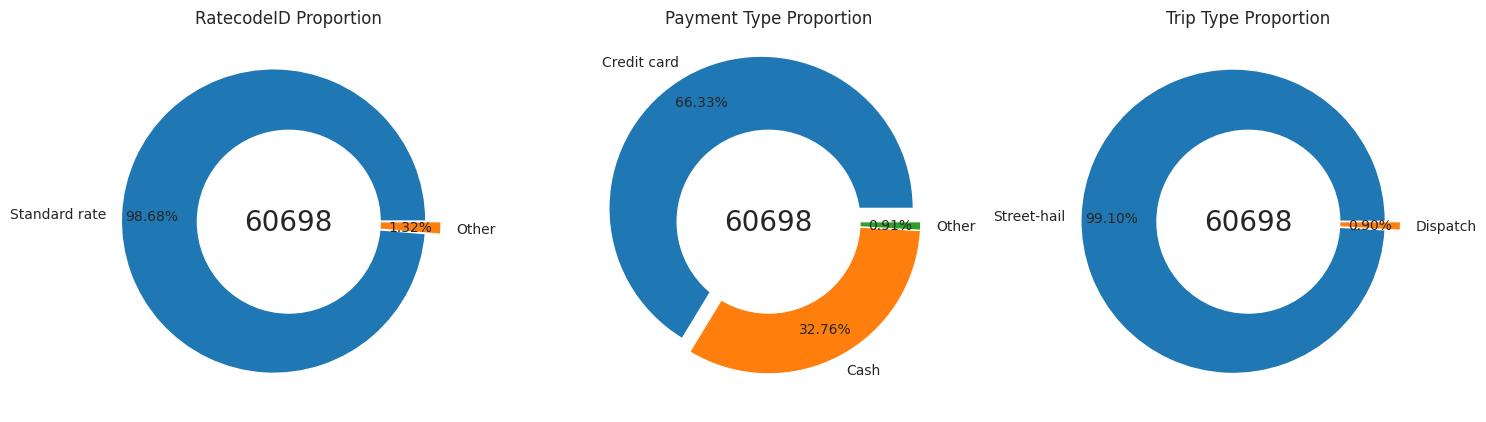

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.pie(x=agg_ratecode['count'],
        labels=agg_ratecode['RatecodeID'],
        pctdistance=0.8,
        autopct='%1.2f%%',
        explode=(0.1,0))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('RatecodeID Proportion')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.subplot(1,3,2)
plt.pie(x=agg_payment['count'],
        labels=agg_payment['payment_type'],
        pctdistance=0.8,
        autopct='%1.2f%%',
        explode=(0.1,0,0))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Payment Type Proportion')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.subplot(1,3,3)
plt.pie(x=agg_triptype['count'],
        labels=agg_triptype['trip_type'],
        pctdistance=0.8,
        autopct='%1.2f%%',
        explode=(0.1,0))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Trip Type Proportion')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.tight_layout()
plt.show()

`Insight`

1. RatecodeID Proportion:
  - Sebagian besar perjalanan menggunakan tarif standar, yaitu sebesar 98,68%.
  - Hanya 1,32% yang menggunakan tarif lainnya.

2. Payment Type Proportion:
  - Pembayaran dengan kartu kredit mendominasi, yaitu 66,33%.
  - Pembayaran tunai digunakan sebanyak 32,76%.
  - Metode pembayaran lainnya sangat kecil, hanya 0,91%.

3. Trip Type Proportion:
  - Mayoritas perjalanan adalah tipe "Street-hail" dengan 99,10%.
  - Tipe "Dispatch" sangat sedikit, hanya 0,90%.

## Trip by Distance, Duration and Speed

In [53]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,day_category,pickup_time,RatecodeID,PULocationID,PUBorough,PUZone,DOLocationID,DOBorough,DOZone,passenger_count,trip_distance,distance_bins,fare_amount,fare_amount_bins,tip_amount,tip_amount_bins,payment_type,trip_type,trip_duration,duration_bins,speed,speed_bins
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Weekend,Midnight,Standard rate,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1.0,2.58,3-5 miles,52.17,41-60$,4.03,1-5$,Credit card,Street-hail,11.016667,11-20 minutes,14.05,11-20 mph
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Weekend,Midnight,Standard rate,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1.0,1.81,<2 miles,17.70,<20$,2.64,1-5$,Credit card,Street-hail,6.766667,<10 minutes,16.05,11-20 mph
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North,1.0,1.30,<2 miles,52.17,41-60$,1.70,1-5$,Credit card,Street-hail,5.816667,<10 minutes,13.41,11-20 mph
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North,1.0,1.10,<2 miles,52.17,41-60$,0.00,0$,Credit card,Street-hail,5.966667,<10 minutes,11.06,11-20 mph
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,262,Manhattan,Yorkville East,1.0,2.78,3-5 miles,52.17,41-60$,0.00,0$,Cash,Street-hail,17.550000,11-20 minutes,9.50,<10 mph


In [54]:
agg_distance = df.groupby('distance_bins').agg(count=('distance_bins', 'count'), median=('trip_distance', 'median')).sort_values(by='count', ascending=False).reset_index()
agg_duration = df.groupby('duration_bins').agg(count=('duration_bins', 'count'), median=('trip_duration', 'median')).sort_values(by='count', ascending=False).reset_index()
agg_speed = df.groupby('speed_bins').agg(count=('speed_bins', 'count'), median=('speed', 'median')).sort_values(by='count', ascending=False).reset_index()

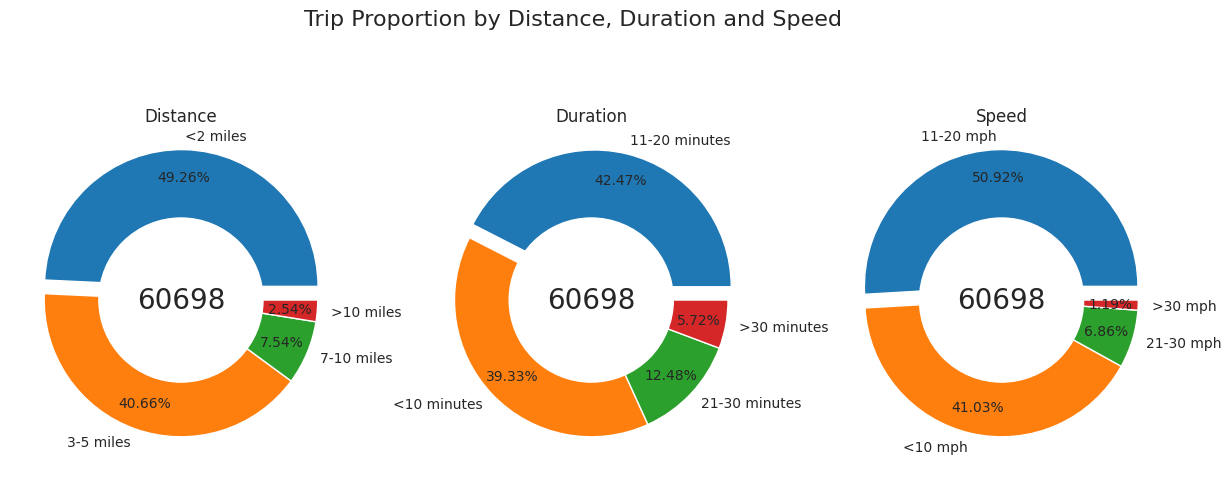

In [55]:
plt.figure(figsize=(15,6))
plt.suptitle('Trip Proportion by Distance, Duration and Speed', fontsize=16)
plt.subplot(1,3,1)

plt.pie(x=agg_distance['count'],
        labels=agg_distance['distance_bins'],
        pctdistance=0.8,
        autopct='%1.2f%%',
        explode=(0.1,0,0,0))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Distance')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.subplot(1,3,2)
plt.pie(x=agg_duration['count'].unique().tolist(),
        labels=agg_duration['duration_bins'],
        pctdistance=0.8,
        autopct='%1.2f%%',
        explode=(0.1,0,0,0))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Duration')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.subplot(1,3,3)
plt.pie(x=agg_speed['count'],
        labels=agg_speed['speed_bins'],
        pctdistance=0.8,
        autopct='%1.2f%%',
        explode=(0.1,0,0,0))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Speed')
plt.text(0, 0, len(df), ha='center', va='center', fontsize=20)

plt.show()

`Insights`
1. Jarak Perjalanan:
  - Sebagian besar perjalanan (49,26%) memiliki jarak kurang dari 2 mil.
  - 40,66% perjalanan berada dalam rentang 3-5 mil.
  - Perjalanan dengan jarak 7-10 mil dan lebih dari 10 mil cukup jarang, masing-masing 7,54% dan 2,54%.

2. Durasi Perjalanan:
  - Durasi perjalanan paling umum adalah 11-20 menit (42,47%).
  - 39,33% perjalanan berlangsung kurang dari 10 menit.
  - Perjalanan dengan durasi 21-30 menit dan lebih dari 30 menit lebih jarang, masing-masing 12,48% dan 5,72%.

3. Kecepatan Perjalanan:
  - Kecepatan perjalanan mayoritas 11-20 mph dengan proporsi sebanyak 50.92%
  - 41.03% perjalanan <10 mph.
  - Perjalanan dengan kecepatan 21-30 mph dan >30 mph masing-masing memiliki proporsi 6.86% dan 1.19%

## Amount Distribution

In [56]:
trip_amount_dist = df.groupby(['PUZone', 'DOZone']).agg(trip_count=('PUZone', 'count'),
                                                        total_fare=('fare_amount', 'sum'),
                                                        avg_fare=('fare_amount', 'mean'),
                                                        total_tip=('tip_amount', 'sum'),
                                                        avg_tip=('tip_amount', 'mean')).reset_index().sort_values(by=['trip_count'], ascending=False).head(10).round(2)
route = trip_amount_dist['PUZone'] + " - " + trip_amount_dist['DOZone']
trip_amount_dist.insert(0, 'Route', route)
trip_amount_dist.drop(columns=['PUZone', 'DOZone'], inplace=True)

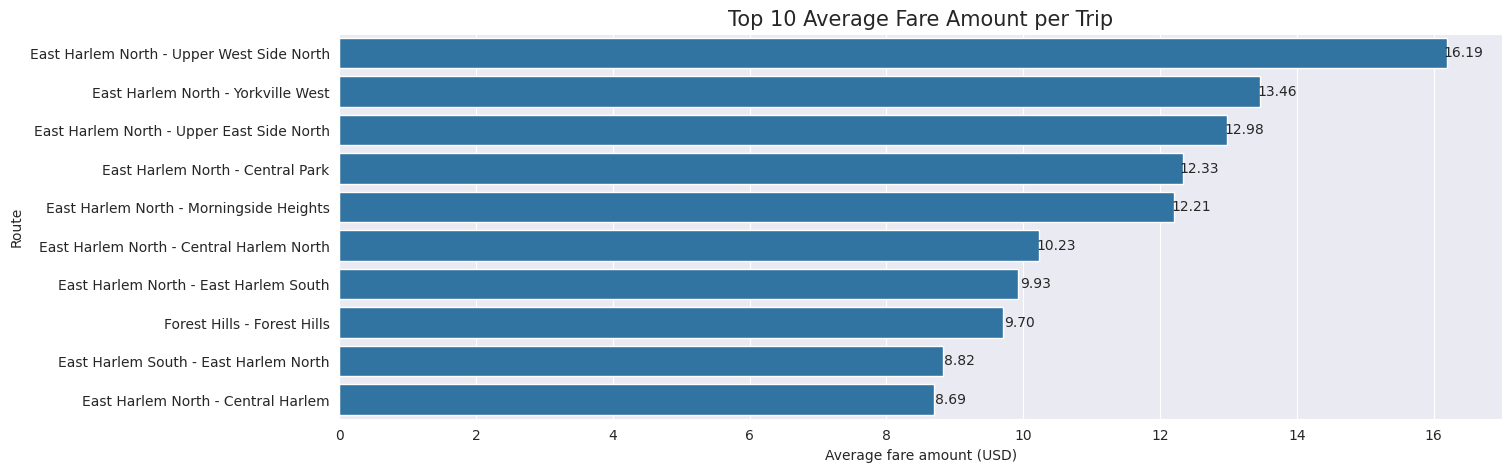

In [57]:
plt.figure(figsize=(15,5))
data = trip_amount_dist.sort_values(by='avg_fare', ascending=False)
bars = sns.barplot(data=data,
                   y='Route',
                   x='avg_fare')
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.25
    label = "{:.2f}".format(data['avg_fare'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')
plt.xlabel('Average fare amount (USD)')
plt.ylabel('Route')
plt.title('Top 10 Average Fare Amount per Trip', fontsize=15)

plt.show()

`Insights`

1. Rute dengan Tarif Tertinggi:
  - Rute "East Harlem North - Upper West Side North" memiliki tarif rata-rata tertinggi sebesar $16,19 per perjalanan.

  - Rute "East Harlem North - Yorkville West" dan "East Harlem North - Upper East Side North" juga memiliki tarif rata-rata tinggi, masing-masing 13,46 USD dan 12,98 USD.

2. Rute dengan Tarif Menengah:
  - Rute seperti "East Harlem North - Central Park" dan "East Harlem North - Morningside Heights" memiliki tarif rata-rata sekitar 12,33 USD dan 12,21 USD.

3. Rute dengan Tarif Lebih Rendah:
  - Rute "East Harlem North - Central Harlem" dan "East Harlem South - East Harlem North" memiliki tarif rata-rata lebih rendah, di bawah $10.

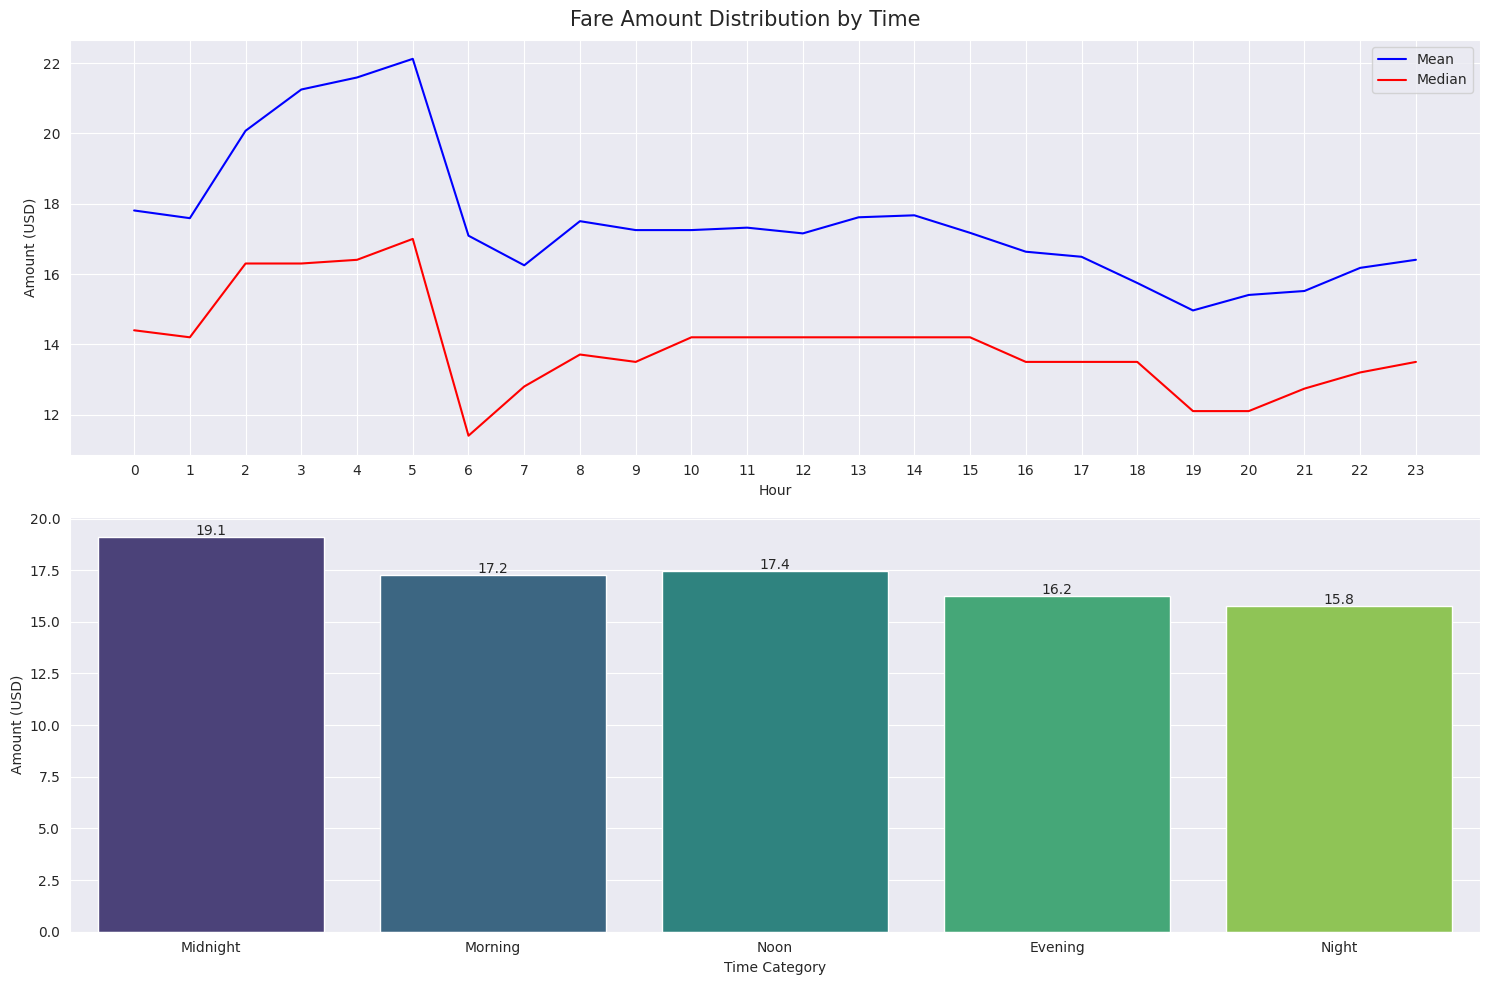

In [58]:
sort_time = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
amount_by_hour = df.groupby(df['lpep_pickup_datetime'].dt.hour).agg(total_fare_amount=('fare_amount', 'sum'),
                                                                    avg_fare_amount=('fare_amount', 'mean'),
                                                                    median_fare_amount=('fare_amount', 'median')).reset_index()
amount_by_time = df.groupby('pickup_time').agg(total_fare_amount=('fare_amount', 'sum'),
                                               avg_fare_amount=('fare_amount', 'mean'),
                                               median_fare_amount=('fare_amount', 'median')).reindex(sort_time).reset_index().round(2)

plt.figure(figsize=(15,10))
plt.suptitle('Fare Amount Distribution by Time', fontsize=15)

plt.subplot(2,1,1)
sns.lineplot(data=amount_by_hour,
             x='lpep_pickup_datetime',
             y='avg_fare_amount',
             color='blue',
             label = 'Mean')
sns.lineplot(data=amount_by_hour,
             x='lpep_pickup_datetime',
             y='median_fare_amount',
             color='red',
             label = 'Median')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Amount (USD)')


plt.subplot(2,1,2)
bars = sns.barplot(data=amount_by_time,
                   x='pickup_time',
                   y='avg_fare_amount',
                   palette='viridis')

for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.3
    label = "{:.1f}".format(amount_by_time['avg_fare_amount'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center', va='center')
plt.xlabel('Time Category')
plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

`Insights`

1. Distribusi Tarif Berdasarkan Jam:
  - Tarif rata-rata dan median tertinggi terjadi sekitar tengah malam hingga dini hari (pukul 0-3), dengan puncak pada pukul 3.
  - Tarif menurun drastis pada pagi hari sekitar pukul 6.
  - Setelah pagi, tarif stabil dengan sedikit fluktuasi sepanjang hari, dan menurun lagi pada malam hari.

2. Distribusi Tarif Berdasarkan Kategori Waktu:
  - Tengah Malam memiliki tarif rata-rata tertinggi (19,1 USD), menunjukkan permintaan tinggi atau tarif premium pada waktu ini.
  - Siang dan Pagi memiliki tarif yang relatif lebih tinggi dibandingkan Sore dan Malam.
  - Malam memiliki tarif rata-rata terendah (15,8 USD).

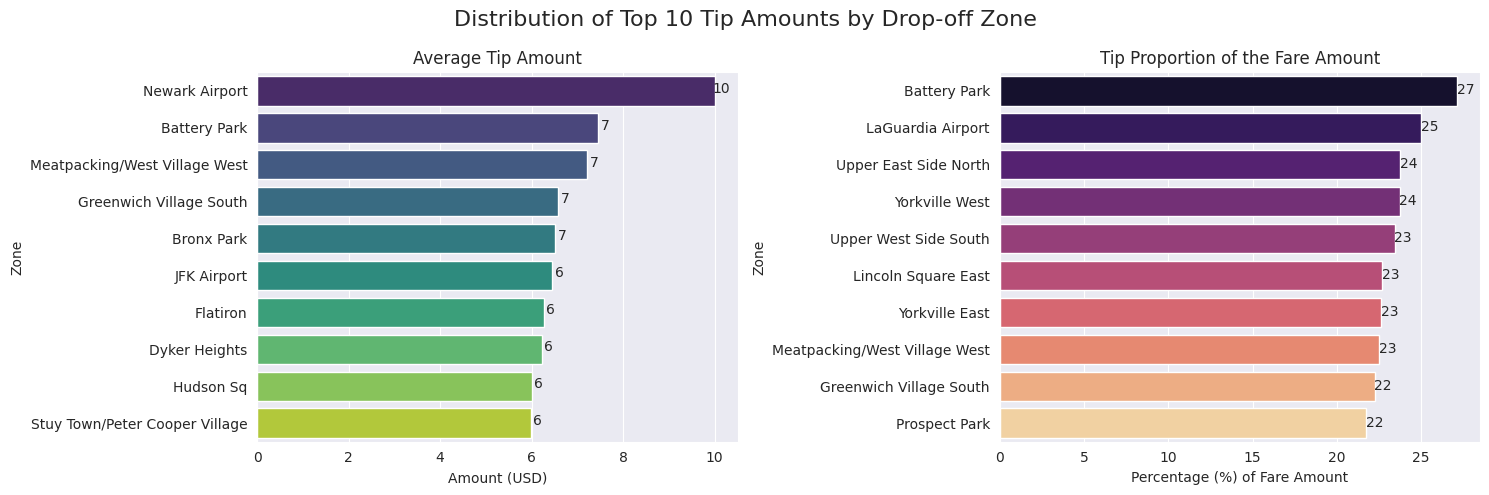

In [59]:
doloc_tip = df.groupby('DOZone').agg(count=('tip_amount', 'count'),
                                     total_tip=('tip_amount', 'sum'),
                                     median_tip=('tip_amount', 'median'),
                                     median_fare=('fare_amount', 'median')).reset_index()
doloc_tip['proportion_of_tip'] = (doloc_tip['median_tip']/doloc_tip['median_fare']*100).round(2)

plt.figure(figsize=(15,5))
plt.suptitle('Distribution of Top 10 Tip Amounts by Drop-off Zone', fontsize=16)

plt.subplot(1,2,1)
data = doloc_tip[doloc_tip['count']>1].sort_values(by='median_tip', ascending=False).head(10).reset_index()
bars= sns.barplot(data=data,
            x='median_tip',
            y='DOZone',
            palette='viridis')
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2 + 0.05
    x_value = bar.get_width() + 0.15
    label = "{:.0f}".format(data['median_tip'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')

plt.title('Average Tip Amount')
plt.xlabel('Amount (USD)')
plt.ylabel('Zone')

plt.subplot(1,2,2)
data = doloc_tip[doloc_tip['count']>1].sort_values(by='proportion_of_tip', ascending=False).head(10).reset_index()
bars = sns.barplot(data=data,
            x='proportion_of_tip',
            y='DOZone',
            palette='magma')
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 1.6
    x_value = bar.get_width() + 0.5
    label = "{:.0f}".format(data['proportion_of_tip'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')

plt.title('Tip Proportion of the Fare Amount')
plt.xlabel('Percentage (%) of Fare Amount')
plt.ylabel('Zone')

plt.tight_layout()
plt.show()

`Insights`

1. Jumlah Tip Rata-rata Berdasarkan Zona:
  - Newark Airport memiliki jumlah tip rata-rata tertinggi sebesar 10 USD.
  - Zona seperti Battery Park, Meatpacking/West Village West, dan Greenwich Village South memiliki tip rata-rata sebesar 7 USD.
  - Zona lainnya seperti JFK Airport, Flatiron, dan Hudson Sq memiliki tip rata-rata sebesar 6 USD.

2. Proporsi Tip terhadap Jumlah Tarif:
  - Battery Park memiliki proporsi tip tertinggi, yaitu 27% dari jumlah tarif.
  - LaGuardia Airport dan Upper East Side North juga memiliki proporsi tip yang tinggi, masing-masing 25% dan 24%.
  - Beberapa zona lain seperti Yorkville West dan Upper West Side South memiliki proporsi tip sekitar 23%.

## Tip Amount Correlation

In [60]:
df_tip_corr = df[['PULocationID', 'DOLocationID', 'trip_distance', 'trip_duration', 'speed', 'fare_amount', 'tip_amount']][df['tip_amount']>0]
df_tip_corr.head()

,PULocationID,DOLocationID,trip_distance,trip_duration,speed,fare_amount,tip_amount
0,166,143,2.58,11.016667,14.05,52.17,4.03
1,24,43,1.81,6.766667,16.05,17.70,2.64
2,41,238,1.30,5.816667,13.41,52.17,1.70
5,181,45,3.80,17.416667,13.09,52.17,4.85
7,41,166,1.11,4.950000,13.45,52.17,1.00


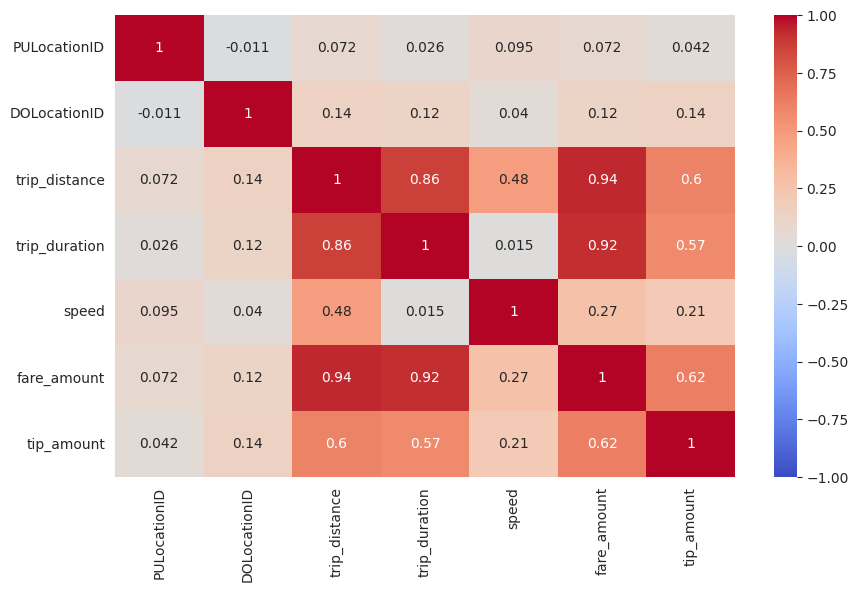

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(df_tip_corr.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

In [62]:
correlation_matrix_tip = df_tip_corr.corr('spearman')
correlation_matrix_tip

,PULocationID,DOLocationID,trip_distance,trip_duration,speed,fare_amount,tip_amount
PULocationID,1.000000,-0.011152,0.072479,0.026103,0.094851,0.071689,0.042045
DOLocationID,-0.011152,1.000000,0.141451,0.123365,0.040455,0.123465,0.142004
trip_distance,0.072479,0.141451,1.000000,0.860034,0.481473,0.936906,0.601818
trip_duration,0.026103,0.123365,0.860034,1.000000,0.014875,0.921420,0.572962
speed,0.094851,0.040455,0.481473,0.014875,1.000000,0.270003,0.207248
fare_amount,0.071689,0.123465,0.936906,0.921420,0.270003,1.000000,0.620695
tip_amount,0.042045,0.142004,0.601818,0.572962,0.207248,0.620695,1.000000


`Insights`

1. Korelasi Tinggi:
  - Jarak Perjalanan (trip_distance) memiliki korelasi tinggi dengan Jumlah Tarif (fare_amount) sebesar 0,94, menunjukkan bahwa semakin jauh jarak perjalanan, semakin tinggi tarifnya.
  - Durasi Perjalanan (trip_duration) juga memiliki korelasi kuat dengan Jumlah Tarif (fare_amount) sebesar 0,92, menandakan bahwa durasi yang lebih lama cenderung meningkatkan tarif.
  - Jarak Perjalanan (trip_distance) dan Durasi Perjalanan (trip_duration) memiliki korelasi tinggi sebesar 0,86, yang wajar karena perjalanan yang lebih jauh biasanya memakan waktu lebih lama.

2. Korelasi Sedang:
  - Jarak Perjalanan (trip_distance) memiliki korelasi sedang dengan Jumlah Tip (tip_amount) sebesar 0,6, menunjukkan bahwa perjalanan yang lebih jauh cenderung menerima tip lebih besar.
  - Durasi Perjalanan (trip_duration) juga memiliki korelasi sedang dengan Jumlah Tip (tip_amount) sebesar 0,57.

3. Korelasi Rendah:
  - Kecepatan (speed) memiliki korelasi rendah dengan variabel lain, menunjukkan bahwa kecepatan tidak terlalu mempengaruhi tarif atau tip secara signifikan.

Kesimpulan:

- Jarak dan durasi perjalanan adalah faktor utama yang mempengaruhi tarif dan tip.
- Kecepatan tidak memiliki pengaruh signifikan terhadap tarif atau tip.

## Signifikansi dari Jumlah Tip (Tip_Amount) ke kolom lain (other features)

### Weekdays or Weekend

In [63]:
day_category_tip_corr = df[df['tip_amount']>0][['day_category','tip_amount']]
day_category_tip_corr.head()

,day_category,tip_amount
0,Weekend,4.03
1,Weekend,2.64
2,Weekend,1.70
5,Weekend,4.85
7,Weekend,1.00


In [64]:
ct_tip_day_category = day_category_tip_corr.groupby('day_category').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).round(2).reset_index()
ct_tip_day_category

,day_category,count,avg_tip,median_tip
0,Weekdays,27796,3.69,3.05
1,Weekend,9219,3.76,3.10


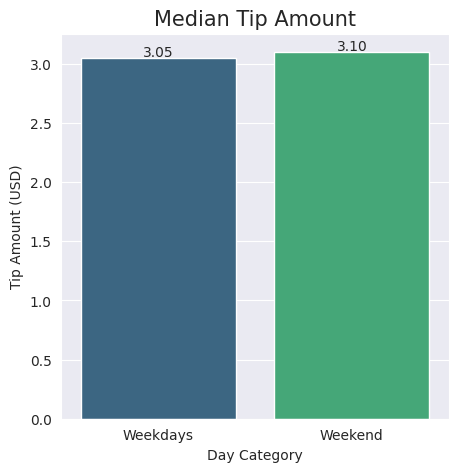

In [65]:
plt.figure(figsize=(5,5))

bars = sns.barplot(data=ct_tip_day_category, x='day_category', y='median_tip', ci=0, palette='viridis')
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.01
    label = "{:.2f}".format(ct_tip_day_category['median_tip'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Day Category')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

Hyptothesis:

- Ho: Median tip pada hari weekend = Median tip pada hari weekdays
- Ha: Median tip pada hari weekend != Median tip pada hari weekdays

In [66]:
from scipy.stats import mannwhitneyu

stat, pvalue = mannwhitneyu(
    day_category_tip_corr[day_category_tip_corr['day_category']=='Weekend']['tip_amount'].sample(100, random_state=0),
    day_category_tip_corr[day_category_tip_corr['day_category']=='Weekdays']['tip_amount'].sample(100, random_state=0),
    alternative='two-sided'
)
print('Pvalue:', pvalue)

if pvalue > 0.05:
  print('Accept Ho')
else:
  print('Reject Ho')

Pvalue: 0.2989890032998106
Accept Ho


**Kesimpulan:**

Berdasarkan uji statistik mannwhitney yang telah dilakukan dengan tingkat signifikansi alpha 5%, didapatkan bukti bahwa median dari nilai tip pada kategori hari weekend sama dengan median dari tip pada kategori hari weekdays

### Pickup Time

In [67]:
pu_time_tip_corr = df[df['tip_amount']>0][['pickup_time','tip_amount']]
pu_time_tip_corr.head()

,pickup_time,tip_amount
0,Midnight,4.03
1,Midnight,2.64
2,Midnight,1.70
5,Midnight,4.85
7,Midnight,1.00


In [68]:
ct_tip_pu_time = pu_time_tip_corr.groupby('pickup_time').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).round(2).reset_index()
ct_tip_pu_time

,pickup_time,count,avg_tip,median_tip
0,Evening,14100,3.69,3.20
1,Midnight,1689,4.09,3.24
2,Morning,8044,3.63,2.88
3,Night,5135,3.56,3.00
4,Noon,8047,3.81,3.14


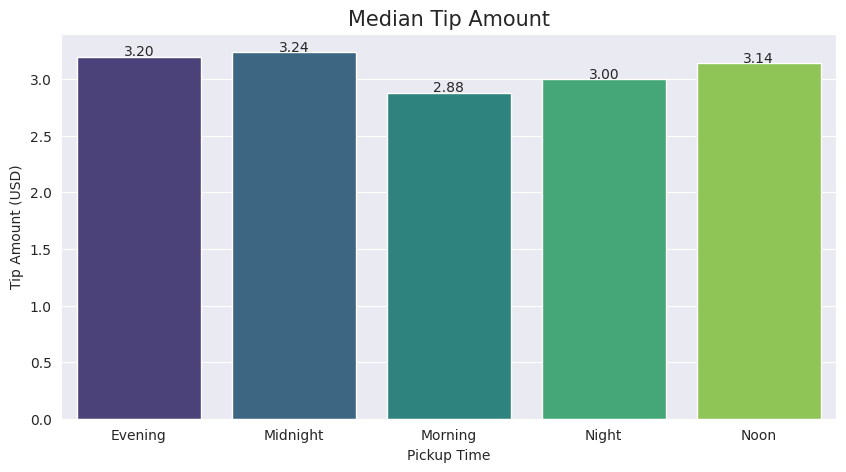

In [69]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=ct_tip_pu_time, x='pickup_time', y='median_tip', ci=0, palette='viridis')
for idx, bar in enumerate(bars.patches):
  x_value = bar.get_x() + bar.get_width() / 2
  y_value = bar.get_height() + 0.01
  label = "{:.2f}".format(ct_tip_pu_time['median_tip'].iloc[idx])
  plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Pickup Time')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

Hypothesis:

Ho: Median Tip pada fitur pickup_time Evening = Midnight = Morning = Night = Noon

Ha: Setidaknya ada satu pasang yang tidak sama

In [70]:
from scipy.stats import kruskal

stats, pvalue = kruskal(
    pu_time_tip_corr[pu_time_tip_corr['pickup_time']=='Evening']['tip_amount'].sample(100, random_state=0),
    pu_time_tip_corr[pu_time_tip_corr['pickup_time']=='Midnight']['tip_amount'].sample(100, random_state=0),
    pu_time_tip_corr[pu_time_tip_corr['pickup_time']=='Morning']['tip_amount'].sample(100, random_state=0),
    pu_time_tip_corr[pu_time_tip_corr['pickup_time']=='Night']['tip_amount'].sample(100, random_state=0),
    pu_time_tip_corr[pu_time_tip_corr['pickup_time']=='Noon']['tip_amount'].sample(100, random_state=0)
)

print('Pvalue:', pvalue)

if pvalue > 0.05:
  print('Accept Ho')
else:
  print('Reject Ho')

Pvalue: 0.4100968738673423
Accept Ho


Kesimpulan:

Berdasarkan uji statistik kruskal-wallis dengan tingkat signifikansi 5%, tidak ada perbedaan yang signifikan dalam pemberian tip antara (minimal) dua dari kategori pickup_time. Sehingga pickup_time tidak berpengaruh pada pemberian tip dari pelanggan.

### Trip Distance

In [71]:
trip_distance_tip_corr = df[df['tip_amount']>0][['distance_bins','tip_amount']]
trip_distance_tip_corr.head()

,distance_bins,tip_amount
0,3-5 miles,4.03
1,<2 miles,2.64
2,<2 miles,1.70
5,3-5 miles,4.85
7,<2 miles,1.00


In [72]:
ct_tip_distance = trip_distance_tip_corr.groupby('distance_bins').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).round(2).reset_index()
ct_tip_distance

,distance_bins,count,avg_tip,median_tip
0,3-5 miles,15731,4.06,4.00
1,7-10 miles,2920,6.84,7.14
2,<2 miles,17419,2.49,2.44
3,>10 miles,945,10.62,10.55


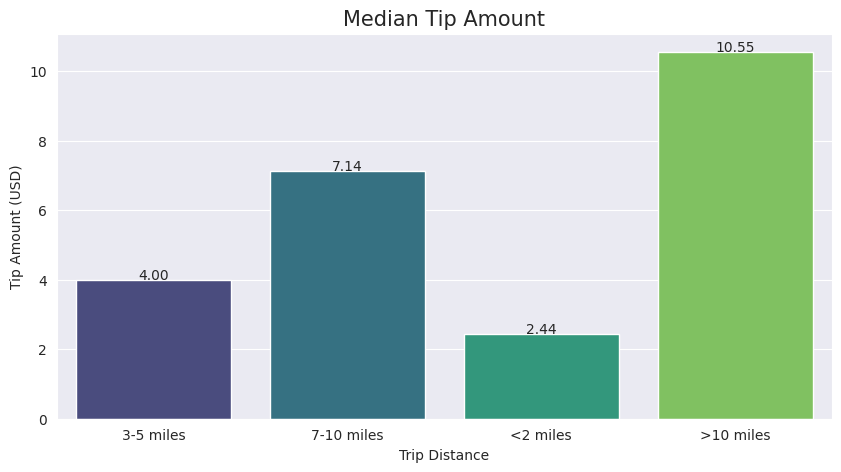

In [73]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data = ct_tip_distance, x='distance_bins', y='median_tip', ci=0, palette='viridis')
for idx, bar in enumerate(bars.patches):
  x_value = bar.get_x() + bar.get_width() / 2
  y_value = bar.get_height() + 0.01
  label = "{:.2f}".format(ct_tip_distance['median_tip'].iloc[idx])
  plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

Hypothesis:

Ho: Median tip pada trip dengan jarak <2 miles = 3-5 miles = 7-10 miles = > 10 miles

Ha: Median tip pada salah satu jarak memiliki nilai yang tidak sama

In [74]:
from scipy.stats import kruskal

stats, pvalue = kruskal(
    trip_distance_tip_corr[trip_distance_tip_corr['distance_bins']=='<2 miles']['tip_amount'].sample(100, random_state=0),
    trip_distance_tip_corr[trip_distance_tip_corr['distance_bins']=='3-5 miles']['tip_amount'].sample(100, random_state=0),
    trip_distance_tip_corr[trip_distance_tip_corr['distance_bins']=='7-10 miles']['tip_amount'].sample(100, random_state=0),
    trip_distance_tip_corr[trip_distance_tip_corr['distance_bins']=='>10 miles']['tip_amount'].sample(100, random_state=0)
)

print('Pvalue:', pvalue)

if pvalue > 0.05:
  print('Accept Ho')
else:
  print('Reject Ho')

Pvalue: 1.6599197209973676e-36
Reject Ho


Kesimpulan:

Berdasarkan uji statistik kruskal yang telah dilakukan dengan tingkat signifikansi 5%, ada perbedaan nilai tip antar satu jarak dengan jarak lainnya. Artinya, jarak perjalanan mempengaruhi besarnya tip yang diberikan oleh pelanggan.

### Trip Duration

In [75]:
trip_duration_tip_corr = df[df['tip_amount']>0][['duration_bins','tip_amount']]
trip_duration_tip_corr.head()

,duration_bins,tip_amount
0,11-20 minutes,4.03
1,<10 minutes,2.64
2,<10 minutes,1.70
5,11-20 minutes,4.85
7,<10 minutes,1.00


In [76]:
ct_tip_trip_duration = trip_duration_tip_corr.groupby('duration_bins').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).round(2).reset_index()
ct_tip_trip_duration

,duration_bins,count,avg_tip,median_tip
0,11-20 minutes,16207,3.71,3.56
1,21-30 minutes,4874,5.56,5.37
2,<10 minutes,13931,2.40,2.34
3,>30 minutes,2003,8.24,7.80


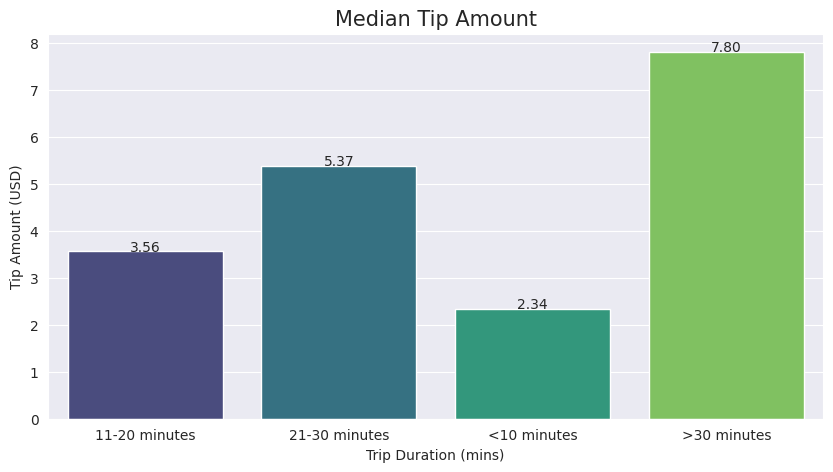

In [77]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data = ct_tip_trip_duration, x='duration_bins', y='median_tip', ci=0, palette='viridis')
for idx, bar in enumerate(bars.patches):
  x_value = bar.get_x() + bar.get_width() / 2
  y_value = bar.get_height() + 0.01
  label = "{:.2f}".format(ct_tip_trip_duration['median_tip'].iloc[idx])
  plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Trip Duration (mins)')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

Hypothesis:

Ho: Median tip pada durasi trip <10 menit = 11-20 menit = 21-30 menit = 30 menit

Ha: Median tip antar tiap kelompok memiliki perbedaan nilai yang signifikan

In [78]:
from scipy.stats import kruskal

stats, pvalue = kruskal(
    trip_duration_tip_corr[trip_duration_tip_corr['duration_bins']=='<10 minutes']['tip_amount'].sample(100, random_state=0),
    trip_duration_tip_corr[trip_duration_tip_corr['duration_bins']=='11-20 minutes']['tip_amount'].sample(100, random_state=0),
    trip_duration_tip_corr[trip_duration_tip_corr['duration_bins']=='21-30 minutes']['tip_amount'].sample(100, random_state=0),
    trip_duration_tip_corr[trip_duration_tip_corr['duration_bins']=='>30 minutes']['tip_amount'].sample(100, random_state=0)
)

print('Pvalue:', pvalue)

if pvalue > 0.05:
  print('Accept Ho')
else:
  print('Reject Ho')

Pvalue: 1.1215830150400793e-35
Reject Ho


Kesimpulan:

Berdasarkan uji statistik kruskal-wallis yang telah dilakukan dengan tingkat signifikansi 5%, didapatkan bukti bahwa ada perbedaan nilai yang signifikan antar tiap kelompok trip duration. Sehingga, durasi perjalanan mempengaruhi besarnya tip yang diberikan oleh pelanggan.

### Driving Speed

In [79]:
tip_speed_corr = df[df['tip_amount']>0][['speed_bins','tip_amount']]
tip_speed_corr.head()

,speed_bins,tip_amount
0,11-20 mph,4.03
1,11-20 mph,2.64
2,11-20 mph,1.70
5,11-20 mph,4.85
7,11-20 mph,1.00


In [80]:
ct_tip_speed = tip_speed_corr.groupby('speed_bins').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).round(2).reset_index()
ct_tip_speed

,speed_bins,count,avg_tip,median_tip
0,11-20 mph,19409,3.68,3.06
1,21-30 mph,2637,5.97,5.24
2,<10 mph,14533,3.19,2.94
3,>30 mph,436,8.51,8.07


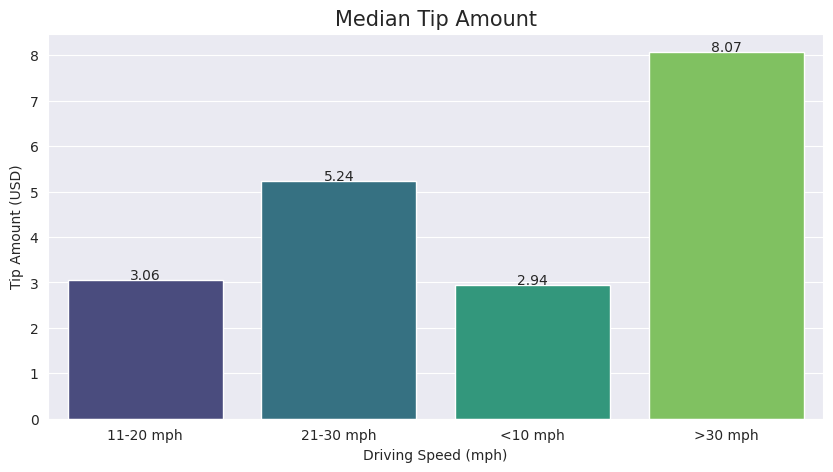

In [81]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data = ct_tip_speed, x='speed_bins', y='median_tip', ci=0, palette='viridis')
for idx, bar in enumerate(bars.patches):
  x_value = bar.get_x() + bar.get_width() / 2
  y_value = bar.get_height() + 0.01
  label = "{:.2f}".format(ct_tip_speed['median_tip'].iloc[idx])
  plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Driving Speed (mph)')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

Hypothesis:

H0: Median tip pada driving speed <10 mph = 11-20 mph = 21-30 mph = >30 mph

Ha: Median tip salah satu kelompok driving speed memiliki nilai yang berbeda secara signifikan

In [82]:
from scipy.stats import kruskal

stats, pvalue = kruskal(
    tip_speed_corr[tip_speed_corr['speed_bins']=='<10 mph']['tip_amount'].sample(100, random_state=0),
    tip_speed_corr[tip_speed_corr['speed_bins']=='11-20 mph']['tip_amount'].sample(100, random_state=0),
    tip_speed_corr[tip_speed_corr['speed_bins']=='21-30 mph']['tip_amount'].sample(100, random_state=0),
    tip_speed_corr[tip_speed_corr['speed_bins']=='>30 mph']['tip_amount'].sample(100, random_state=0)
)

print('Pvalue:', pvalue)

if pvalue > 0.05:
  print('Accept Ho')
else:
  print('Reject Ho')

Pvalue: 4.032434782413984e-23
Reject Ho


Kesimpulan:

Berdasarkan uji statistik kruskal dengan tingkat signifikansi 5%, kita memiliki bukti bahwa ada perbedaan nilai secara signifikan pada pemberian tip oleh pelanggan berdasarkan driving speed. Dengan kata lain, kecepatan mengendara mempengaruhi besarnya tip oleh pelanggan.

### Fare Amount

In [83]:
tip_fare_corr = df[df['tip_amount']>0][['fare_amount_bins','tip_amount']]
tip_fare_corr.head()

,fare_amount_bins,tip_amount
0,41-60$,4.03
1,<20$,2.64
2,41-60$,1.70
5,41-60$,4.85
7,41-60$,1.00


In [84]:
ct_tip_fare_amount = tip_fare_corr.groupby('fare_amount_bins').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).round(2).reset_index()
ct_tip_fare_amount

,fare_amount_bins,count,avg_tip,median_tip
0,21-40$,7891,5.44,5.46
1,41-60$,1089,8.63,9.41
2,<20$,27685,2.89,2.80
3,>60$,350,14.03,15.60


<function matplotlib.pyplot.show(close=None, block=None)>

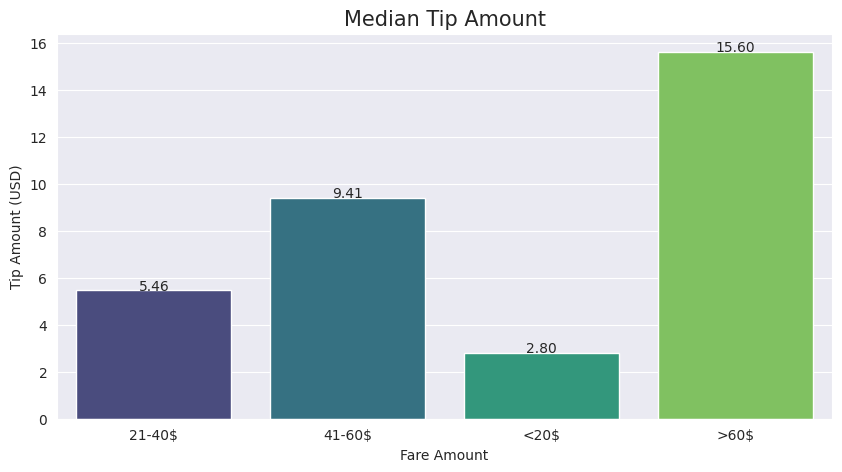

In [85]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data = ct_tip_fare_amount, x='fare_amount_bins', y='median_tip', ci=0, palette='viridis')
for idx, bar in enumerate(bars.patches):
  x_value = bar.get_x() + bar.get_width() / 2
  y_value = bar.get_height() + 0.01
  label = "{:.2f}".format(ct_tip_fare_amount['median_tip'].iloc[idx])
  plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show

Hypothesis:

Ho: Median tip pada fare amount <20 USD = 21-40 USD = 41-60 USD = 60 USD

Ha: Median tip pada salah satu kelompok fare_amount memiliki nilai yang berbeda secara signifikan

In [86]:
from scipy.stats import kruskal

stats, pvalue = kruskal(
    tip_fare_corr[tip_fare_corr['fare_amount_bins']=='<20$']['tip_amount'].sample(100, random_state=0),
    tip_fare_corr[tip_fare_corr['fare_amount_bins']=='21-40$']['tip_amount'].sample(100, random_state=0),
    tip_fare_corr[tip_fare_corr['fare_amount_bins']=='41-60$']['tip_amount'].sample(100, random_state=0),
    tip_fare_corr[tip_fare_corr['fare_amount_bins']=='>60$']['tip_amount'].sample(100, random_state=0)
)

print('Pvalue:', pvalue)

if pvalue > 0.05:
  print('Accept Ho')
else:
  print('Reject Ho')

Pvalue: 4.070740416239468e-36
Reject Ho


Kesimpulan:

Berdasarkan uji statistik kruskal yang telah dilakukan dengan tingkat signifikansi 5%, kita memiliki bukti bahwa ada perbedaan nilai tip yang berbeda secara signifikan tiap kelompok fare_amount. Sehingga dapat diambil kesimpulan bahwa tarif mempengaruhi tip yang diberikan oleh pelanggan

`Insights`

- Faktor-faktor yang tidak mempengaruhi pemberian tip oleh pelanggan: day_category (Weekdays or Weekend), pickup_time
- Faktor-faktor yang  mempengaruhi pemberian tip oleh pelanggan: trip_type, trip_distance, trip_duration, driving speed, fare_amount

# Kesimpulan dan Rekomendasi

## **Kesimpulan:**

### 1. **Permintaan Tinggi pada Hari Kerja**  
   - Data menunjukkan bahwa aktivitas taksi lebih padat pada hari kerja dibandingkan akhir pekan. Hal ini dapat dikaitkan dengan kebutuhan transportasi untuk bekerja, menghadiri pertemuan, atau keperluan bisnis lainnya. Sebaliknya, permintaan berkurang pada akhir pekan, yang kemungkinan besar disebabkan oleh lebih sedikitnya aktivitas rutin.  

### 2. **Waktu Penjemputan Malam Hari (Evening) sebagai Periode Tersibuk**  
   - Waktu malam, terutama setelah jam kerja (15.00-20.00), menjadi puncak permintaan. Ini mencerminkan kebiasaan pelanggan yang memanfaatkan taksi untuk pulang kerja, pulang sekolah atau acara-acara lainnya yang berlangsung di jam-jam tersebut.

### 3. **Dominasi Wilayah Manhattan**  
   - Sebagai pusat ekonomi dan budaya, Manhattan adalah tujuan utama perjalanan taksi. Banyak pelanggan memilih untuk memulai atau mengakhiri perjalanan mereka di wilayah ini, terutama di zona-zona seperti East Harlem North dan East Harlem South yang dikenal dengan aktivitas bisnis dan sosial yang tinggi.  

### 4. **Preferensi Perjalanan Singkat dan Efisien**  
   - Sebagian besar perjalanan berada dalam kategori jarak pendek (kurang dari 2 mil) dan durasi singkat (kurang dari 20 menit). Hal ini menunjukkan bahwa pelanggan lebih memilih taksi untuk perjalanan lokal yang cepat dibandingkan moda transportasi lain seperti bus atau subway, yang mungkin kurang fleksibel untuk jarak pendek.  

### 5. **Metode Pemesanan dan Tarif**  
   - Pelanggan lebih sering menggunakan metode pemesanan langsung di jalan (street-hailing) dibandingkan pemesanan melalui aplikasi. Tarif standar (standard rate) juga menjadi pilihan utama, yang menunjukkan bahwa pelanggan menginginkan transparansi harga dan kesederhanaan dalam transaksi. Pelanggan juga lebih umum menggunakan tipe pembayaran menggunakan kartu kredit ketimbang cash.

### 6. **Faktor yang Mempengaruhi Tip**  
   - Jumlah tip yang diberikan pelanggan dipengaruhi oleh kombinasi beberapa faktor, termasuk jarak tempuh, durasi, kecepatan berkendara, dan total ongkos. Pelanggan cenderung memberikan tip lebih tinggi ketika perjalanan nyaman, cepat, dan layanan yang diberikan memuaskan. Faktor-faktor seperti waktu pickup dan kategori hari (weekdays atau weekends) tidak berpengaruh pada pemberian tip oleh pelanggan.

## **Kesimpulan Umum:**

Permintaan taksi lebih tinggi pada hari kerja dibandingkan akhir pekan, dengan waktu penjemputan malam hari menjadi periode paling sibuk. Manhattan menjadi tujuan paling populer, di mana pelanggan cenderung memilih tarif standar (standard fare rates) dan metode pemesanan langsung di jalan (street-hailing). Tipe pembayaran yang paling populer adalah menggunakan credit card dimana dengan pembayaran ini pula pelanggan dapat memberikan tip. Sebagian besar pengguna taksi lebih memilih bepergian sendiri, terutama untuk perjalanan jarak pendek kurang dari 2 mil dengan durasi di bawah 20 menit. Pola ini menunjukkan bahwa layanan taksi sangat cocok untuk kebutuhan transportasi lokal yang cepat dan efisien. Selain itu, faktor seperti jarak tempuh, durasi, kecepatan berkendara, dan jumlah ongkos memengaruhi besarnya tip yang diberikan pelanggan, yang mencerminkan kepuasan mereka terhadap layanan yang diterima.

## **Rekomendasi untuk Optimasi Layanan Taksi**  

### **1. Penjadwalan Armada Taksi**  
- Tingkatkan jumlah armada pada hari kerja, terutama selama jam sibuk (misalnya pukul 15.00-20.00), untuk memenuhi lonjakan permintaan.
- Optimalkan operasional taksi dengan mengurangi layanan taksi di akhir pekan dan pada jam-jam larut malam hingga dini hari dimana permintaan rendah.
- Pada hari kerja dengan volume trip tertinggi seperti hari Selasa dan Kamis, pastikan ketersediaan armada taksi yang lebih banyak untuk memenuhi permintaan.
- Memberikan insentif bonus untuk supir yang melayani shift pada hari-hari tersebut, untuk meningkatkan motivasi dan kinerja mereka.

### **2. Penargetan Wilayah**  
- Meningkatkan jumlah taksi di Manhattan, Queens, dan Brooklyn karena permintaannya lebih tinggi dibandingkan wilayah lain.
- Mengevaluasi kembali alokasi armada di area dengan permintaan rendah, seperti Staten Island.
- Mengembangkan terminal titik tunggu strategis di dekat lokasi penjemputan yang populer.
- East Harlem North dan East Harlem South adalah destinasi pickup dan dropoff terbanyak, sehingga perusahaan perlu mengalokasikan armada taksi yang memadai di zona ini.

### **3. Strategi Berdasarkan Harga**  
- Prioritaskan layanan taksi pada rute dengan jumlah tarif rata-rata tertinggi, seperti rute East Harlem North ke Upper West Side North, Yorkville West.
- Tawarkan promosi atau diskon selama periode permintaan rendah, seperti larut malam atau dini hari, untuk menarik lebih banyak pelanggan.
- Tawarkan promosi atau diskon selama periode weekend, untuk menaikkan volume pemesanan perjalanan selama periode tersebut.
- Menaikkan tarif pada hari kerja, terutama pada jam sibuk, untuk meningkatkan pendapatan.

### **4. Opsi Pembayaran**  
- Pastikan sistem pembayaran kartu kredit berfungsi secara efisien, mengingat ini adalah pilihan pembayaran yang dominan.
- Karena pemberian tip mayoritas menggunakan kartu kredit, beri diskon tertentu atau memberi "Reward" untuk pelanggan yang melakukan pembayaran menggunakan kartu kredit.
- Perluas metode pembayaran dengan menyediakan opsi seperti e-wallet atau aplikasi pembayaran berbasis QR untuk meningkatkan kenyamanan pelanggan.

### **5. Promosi dan Penawaran**  
- Luncurkan promosi khusus untuk rute dengan jumlah tarif tertinggi untuk menarik lebih banyak pelanggan.
- Pertimbangkan untuk memberikan diskon atau penawaran khusus di area atau waktu dengan jumlah tarif rata-rata yang lebih rendah untuk menarik lebih banyak pelanggan. 
- Menawarkan paket atau promo perjalanan jarak jauh dan durasi lebih lama, mengingat faktor tersebut juga berkorelasi positif dengan tip.
- Pertimbangkan kemitraan bisnis di area dengan lalu lintas tinggi di Manhattan.
- Target pelanggan dengan jarak pendek >2 miles dengan cara memberi promosi atau diskon seperti paket "City Hopper" untuk menarik pelanggan yang memakai jasa taksi untuk perjalanan jarak pendek. Partnership dengan bisnis lokal dan tempat wisata sekitar untuk menyediakan kode diskon yang membutuhkan perjalanan jarak pendek di kota.

### **6. Peningkatan Kualitas Pelayanan**
- Meskipun kecepatan berkendara memiliki korelasi yang lemah dengan tip, faktor itu tetap memengaruhi jumlah tip yang diberikan. Oleh karena itu, penting untuk memastikan pengemudi memprioritaskan berkendara yang aman dan nyaman, karena pelanggan mungkin memberikan tip yang lebih besar untuk perjalanan seperti itu.
- Fokus pada Perjalanan Pendek dan Efisien: Karena pelanggan lebih suka taksi untuk perjalanan lokal cepat, pastikan layanannya cepat dan pengemudi memiliki pengetahuan tentang rute tercepat.

### **7. Go Digital dengan aplikasi E-Hail**
- Fitur Pelacakan Real-Time: Memungkinkan pelanggan untuk melihat lokasi taksi yang dipesan secara real-time. Fitur ini meningkatkan transparansi dan kepercayaan, karena pelanggan dapat memantau kedatangan taksi dan estimasi waktu perjalanan.
- Estimasi Tarif dan Waktu Kedatangan: Memberikan estimasi biaya perjalanan dan waktu kedatangan taksi, membantu pelanggan membuat keputusan yang lebih baik dan mengelola waktu mereka dengan lebih efisien.
- Beragam Metode Pembayaran: Menyediakan berbagai opsi pembayaran seperti e-wallet, dan pembayaran berbasis QR.
- Mengembangkan fitur kategori perjalanan di E-Hail App, contoh tipe perjalanan JFK Airport, Newark Airport dan tujuan lain. Aksi ini dapat juga memberi kalkulasi tarif yang lebih presisi terhadap tipe perjalanan yang dipilih oleh pelanggan.
- Memperkenalkan sistem tarif dinamis melalui E-Hail App, seperti kenaikan tarif sebesar 5-10% pada hari kerja dan jam sibuk dan memberi diskon 10-20% pada hari libur dan jam sepi untuk meningkatkan volume perjalanan.
- Pertimbangkan untuk menerapkan sistem pemberian tip yang disederhanakan melalui antarmuka pembayaran di E-Hail App.

### 8. Pemasaran dan Interaksi Pelanggan
- Periklanan yang Ditargetkan: Gunakan analisis data untuk mengidentifikasi rute dan waktu yang populer, dan arahkan iklan kepada calon pelanggan selama periode puncak tersebut.
- Program Loyalitas: Kembangkan program loyalitas yang memberikan penghargaan kepada pelanggan yang sering menggunakan layanan dengan diskon atau keuntungan tambahan, untuk mendorong repeat order selama waktu-waktu yang kurang sibuk.